In [1]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict_ngp_on = {type: {} for type in types}
types_dict_ngp_off = {type: {} for type in types}
types_dict_nerfacto_on = {type: {} for type in types}
types_dict_nerfacto_off = {type: {} for type in types}


path_lego_ngp_on = r'C:\Stuff\Results\metrics\ngp_lego_opt_on_metrics.npy'
path_lego_ngp_off = r'C:\Stuff\Results\metrics\ngp_lego_opt_off_metrics.npy'
path_lego_nerfacto_on = r'C:\Stuff\Results\metrics\nerfacto_lego_opt_on_metrics.npy'
path_lego_nerfacto_off = r'C:\Stuff\Results\metrics\nerfacto_lego_opt_off_metrics.npy'

ngp_on = np.load(path_lego_ngp_on, allow_pickle=True).item()
ngp_off = np.load(path_lego_ngp_off, allow_pickle=True).item()
nerfacto_on = np.load(path_lego_nerfacto_on, allow_pickle=True).item()
nerfacto_off = np.load(path_lego_nerfacto_off, allow_pickle=True).item()

for k,v in ngp_on.items():
    for type in types:
        if type in k:
            types_dict_ngp_on[type][k] = v

for k,v in ngp_off.items():
    for type in types:
        if type in k:
            types_dict_ngp_off[type][k] = v

for k,v in nerfacto_on.items():
    if 'lego-orient-std' in k:
        k = k.replace('lego-orient-std', 'lego-orientation-std')
    elif 'lego-pos-std' in k:
        k = k.replace('lego-pos-std', 'lego-position-std')
    for type in types:
        if type in k:
            types_dict_nerfacto_on[type][k] = v

for k,v in nerfacto_off.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_off[type][k] = v                                

benchmark_psnr_ngp_on = types_dict_ngp_on['benchmark']['benchmark-ngp-lego-opt-on']['PSNR']
benchmark_ssim_ngp_on = types_dict_ngp_on['benchmark']['benchmark-ngp-lego-opt-on']['SSIM']
benchmark_lpips_ngp_on = types_dict_ngp_on['benchmark']['benchmark-ngp-lego-opt-on']['LPIPS']

benchmark_psnr_ngp_off = types_dict_ngp_off['benchmark']['benchmark-ngp-lego-opt-off']['PSNR']
benchmark_ssim_ngp_off = types_dict_ngp_off['benchmark']['benchmark-ngp-lego-opt-off']['SSIM']
benchmark_lpips_ngp_off = types_dict_ngp_off['benchmark']['benchmark-ngp-lego-opt-off']['LPIPS']

benchmark_psnr_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_lego_opt_on_benchmark']['PSNR']
benchmark_ssim_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_lego_opt_on_benchmark']['SSIM']
benchmark_lpips_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_lego_opt_on_benchmark']['LPIPS']

benchmark_psnr_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_lego_opt_off_benchmark']['PSNR']
benchmark_ssim_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_lego_opt_off_benchmark']['SSIM']
benchmark_lpips_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_lego_opt_off_benchmark']['LPIPS']

benchmarks_psnr = [benchmark_psnr_ngp_on, benchmark_psnr_ngp_off, benchmark_psnr_nerfacto_on, benchmark_psnr_nerfacto_off]
benchmarks_ssim = [benchmark_ssim_ngp_on, benchmark_ssim_ngp_off, benchmark_ssim_nerfacto_on, benchmark_ssim_nerfacto_off]
benchmarks_lpips = [benchmark_lpips_ngp_on, benchmark_lpips_ngp_off, benchmark_lpips_nerfacto_on, benchmark_lpips_nerfacto_off]


In [2]:
types_dict_nerfacto_off['saturation'] = {k.replace("outputs-nerfacto-lego-opt-off-satur-range_", ""): v for k, v in types_dict_nerfacto_off['saturation'].items()}
types_dict_nerfacto_on['saturation'] = {k.replace("outputs-nerfacto-lego-opt-on-satur-range_", ""): v for k, v in types_dict_nerfacto_on['saturation'].items()}
types_dict_ngp_off['saturation'] = {k.replace("outputs-ngp-lego-opt-off-satur-range_", ""): v for k, v in types_dict_ngp_off['saturation'].items()}
types_dict_ngp_on['saturation'] = {k.replace("outputs-ngp-lego-opt-on-satur-range_", ""): v for k, v in types_dict_ngp_on['saturation'].items()}

types_dict_nerfacto_off['range'] = {k.replace("outputs-nerfacto-lego-opt-off-satur-range_", ""): v for k, v in types_dict_nerfacto_off['range'].items()}
types_dict_nerfacto_on['range'] = {k.replace("outputs-nerfacto-lego-opt-on-satur-range_", ""): v for k, v in types_dict_nerfacto_on['range'].items()}
types_dict_ngp_off['range'] = {k.replace("outputs-ngp-lego-opt-off-satur-range_", ""): v for k, v in types_dict_ngp_off['range'].items()}
types_dict_ngp_on['range'] = {k.replace("outputs-ngp-lego-opt-on-satur-range_", ""): v for k, v in types_dict_ngp_on['range'].items()}

types_dict_nerfacto_off['every'] = {k.replace("nerfacto_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_nerfacto_off['every'].items()}
types_dict_nerfacto_on['every'] = {k.replace("nerfacto_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_nerfacto_on['every'].items()}
types_dict_ngp_off['every'] = {k.replace("ngp_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_ngp_off['every'].items()}
types_dict_ngp_on['every'] = {k.replace("ngp_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_ngp_on['every'].items()}

types_dict_nerfacto_off['gamma'] = {k.replace("nerfacto_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_nerfacto_off['gamma'].items()}
types_dict_nerfacto_on['gamma'] = {k.replace("nerfacto_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_nerfacto_on['gamma'].items()}
types_dict_ngp_off['gamma'] = {k.replace("ngp_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_ngp_off['gamma'].items()}
types_dict_ngp_on['gamma'] = {k.replace("ngp_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_ngp_on['gamma'].items()}

types_dict_nerfacto_off['noise-std'] = {k.replace("nerfacto_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_nerfacto_off['noise-std'].items()}
types_dict_nerfacto_on['noise-std'] = {k.replace("nerfacto_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_nerfacto_on['noise-std'].items()}
types_dict_ngp_off['noise-std'] = {k.replace("ngp_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_ngp_off['noise-std'].items()}
types_dict_ngp_on['noise-std'] = {k.replace("ngp_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_ngp_on['noise-std'].items()}

types_dict_nerfacto_off['blue-noise'] = {k.replace("nerfacto_opt_off_", ""): v for k, v in types_dict_nerfacto_off['blue-noise'].items()}
types_dict_nerfacto_on['blue-noise'] = {k.replace("nerfacto_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_nerfacto_on['blue-noise'].items()}
types_dict_ngp_off['blue-noise'] = {k.replace("ngp_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_ngp_off['blue-noise'].items()}
types_dict_ngp_on['blue-noise'] = {k.replace("ngp_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_ngp_on['blue-noise'].items()}

types_dict_nerfacto_off['red-noise'] = {k.replace("nerfacto_opt_off_", ""): v for k, v in types_dict_nerfacto_off['red-noise'].items()}
types_dict_nerfacto_on['red-noise'] = {k.replace("nerfacto_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_nerfacto_on['red-noise'].items()}
types_dict_ngp_off['red-noise'] = {k.replace("ngp_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_ngp_off['red-noise'].items()}
types_dict_ngp_on['red-noise'] = {k.replace("ngp_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_ngp_on['red-noise'].items()}

types_dict_nerfacto_off['green-noise'] = {k.replace("nerfacto_opt_off_", ""): v for k, v in types_dict_nerfacto_off['green-noise'].items()}
types_dict_nerfacto_on['green-noise'] = {k.replace("nerfacto_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_nerfacto_on['green-noise'].items()}
types_dict_ngp_off['green-noise'] = {k.replace("ngp_lego_opt_off_degr_runs_", ""): v for k, v in types_dict_ngp_off['green-noise'].items()}
types_dict_ngp_on['green-noise'] = {k.replace("ngp_lego_opt_on_degr_runs_", ""): v for k, v in types_dict_ngp_on['green-noise'].items()}


In [3]:
psnr_metrics_ngp_on = {}
psnr_metrics_ngp_off = {}
psnr_metrics_nerfacto_on = {}
psnr_metrics_nerfacto_off = {}

ssim_metrics_ngp_on = {}
ssim_metrics_ngp_off = {}
ssim_metrics_nerfacto_on = {}
ssim_metrics_nerfacto_off = {}

lpips_metrics_ngp_on = {}
lpips_metrics_ngp_off = {}
lpips_metrics_nerfacto_on = {}
lpips_metrics_nerfacto_off = {}

for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        if type == 'range': sorted_names = [name for name in sorted_names if 'range' in name]
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'
    if type == 'range': exp_name_joined = 'lego-range'
    psnr_metrics_ngp_on[exp_name_joined] =  sorted_psnrs
    ssim_metrics_ngp_on[exp_name_joined] =  sorted_ssims
    lpips_metrics_ngp_on[exp_name_joined] =  sorted_lpips



for type, metrics in types_dict_ngp_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        if type == 'range': sorted_names = [name for name in sorted_names if 'range' in name]
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    if exp_name_joined == 'lego-saturation-std':
        print(len(sorted_psnrs))
        print(sorted_names)

    if type == 'range': exp_name_joined = 'lego-range'

    psnr_metrics_ngp_off[exp_name_joined] =  sorted_psnrs
    ssim_metrics_ngp_off[exp_name_joined] =  sorted_ssims
    lpips_metrics_ngp_off[exp_name_joined] =  sorted_lpips

for type, metrics in types_dict_nerfacto_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        if type == 'range': sorted_names = [name for name in sorted_names if 'range' in name]
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'
    if type == 'range': exp_name_joined = 'lego-range'

    psnr_metrics_nerfacto_on[exp_name_joined] =  sorted_psnrs
    ssim_metrics_nerfacto_on[exp_name_joined] =  sorted_ssims
    lpips_metrics_nerfacto_on[exp_name_joined] =  sorted_lpips


for type, metrics in types_dict_nerfacto_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        if type == 'range': sorted_names = [name for name in sorted_names if 'range' in name]
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'
    if type == 'range': exp_name_joined = 'lego-range'

    psnr_metrics_nerfacto_off[exp_name_joined] =  sorted_psnrs
    ssim_metrics_nerfacto_off[exp_name_joined] =  sorted_ssims
    lpips_metrics_nerfacto_off[exp_name_joined] =  sorted_lpips


10
['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']


In [4]:
xticks = {}
for key in types_dict_nerfacto_off.keys():
    if key != 'benchmark':
        keys2 = list(types_dict_nerfacto_off[key].keys())
        # print(keys2)
        values = sorted([float(key.split('-')[-1]) for key in keys2])
        values = [int(i) if i > 1 else i for i in values]
        if key == 'range':
            values = [value for value in values if value > 5]
            values = [f'{number-10}-{number}' for number in values]
        # else:
        values = ['orig'] + values
        xticks[key] = values
        print(key)
        print(xticks[key])


every
['orig', 2, 3, 4, 5, 6, 7, 8]
gamma
['orig', 5, 10, 15, 20, 25, 30, 35, 40]
noise-std
['orig', 16, 32, 48, 64, 80, 96, 112, 128]
orientation
['orig', 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
blue-noise
['orig', 5, 10, 15, 20, 25, 30, 35, 40]
green-noise
['orig', 5, 10, 15, 20, 25, 30, 35, 40]
red-noise
['orig', 5, 10, 15, 20, 25, 30, 35, 40]
pos-orient
['orig', 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
position
['orig', 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
range
['orig', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
saturation
['orig', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


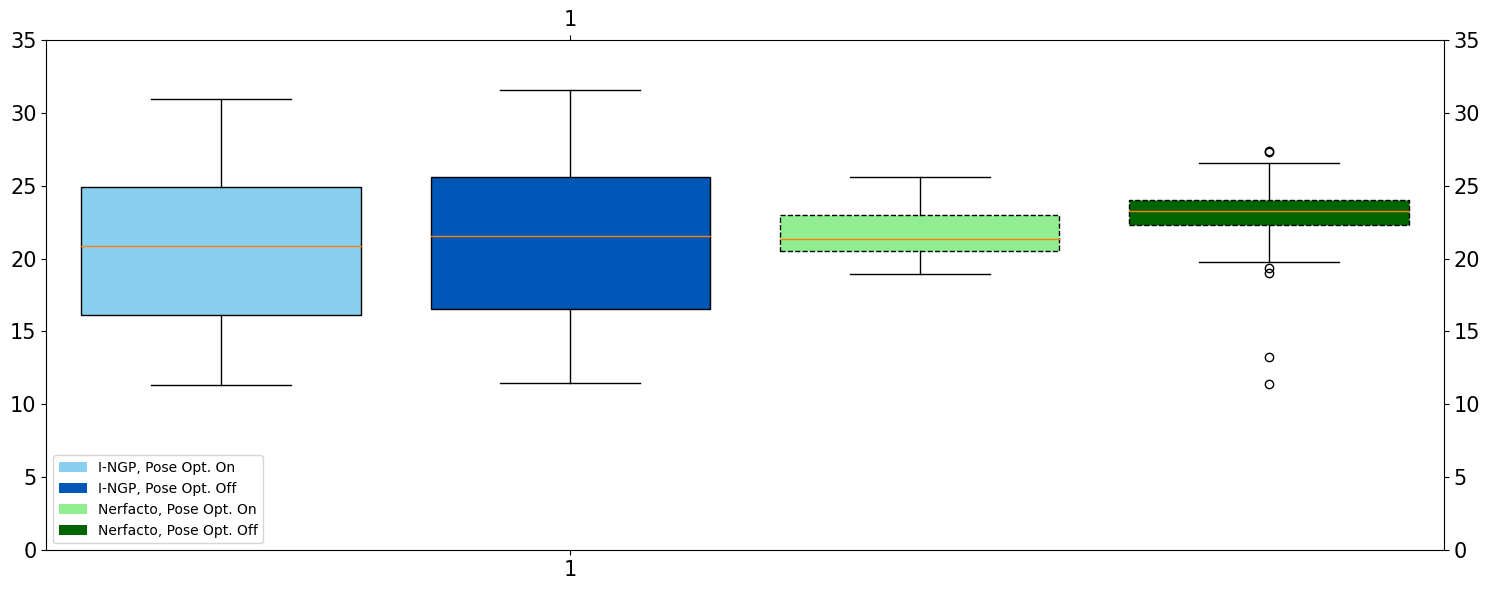

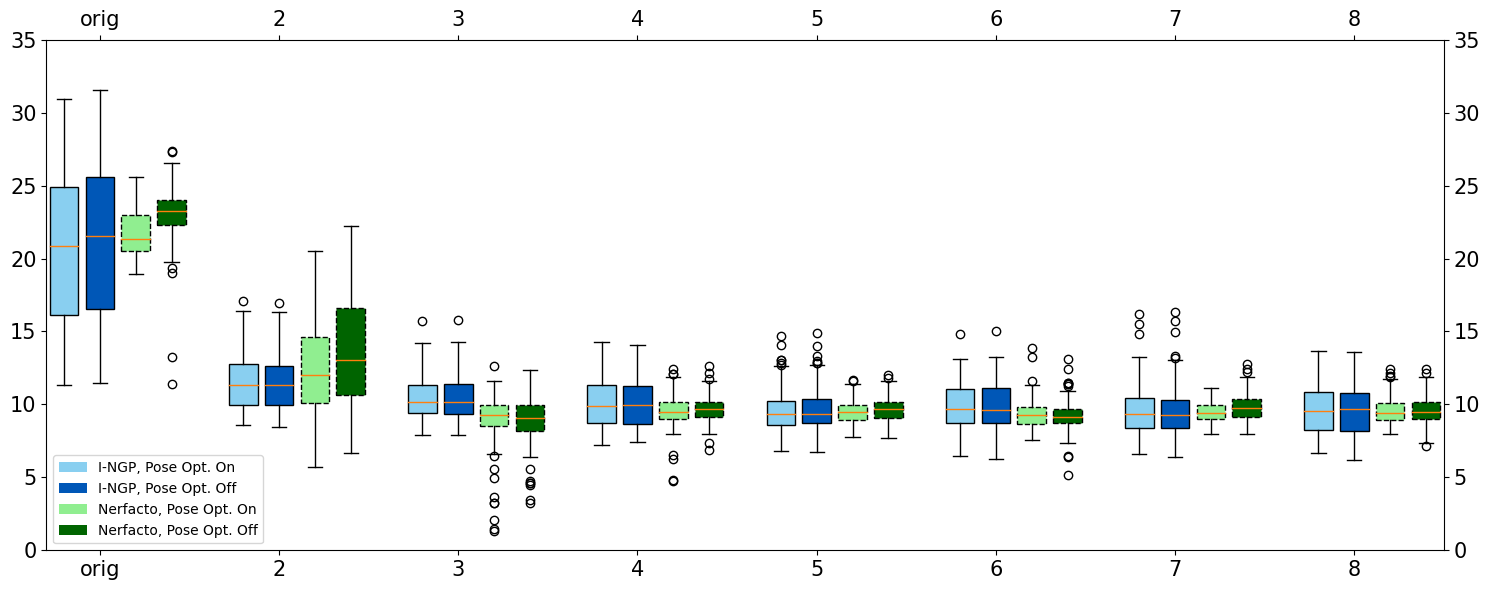

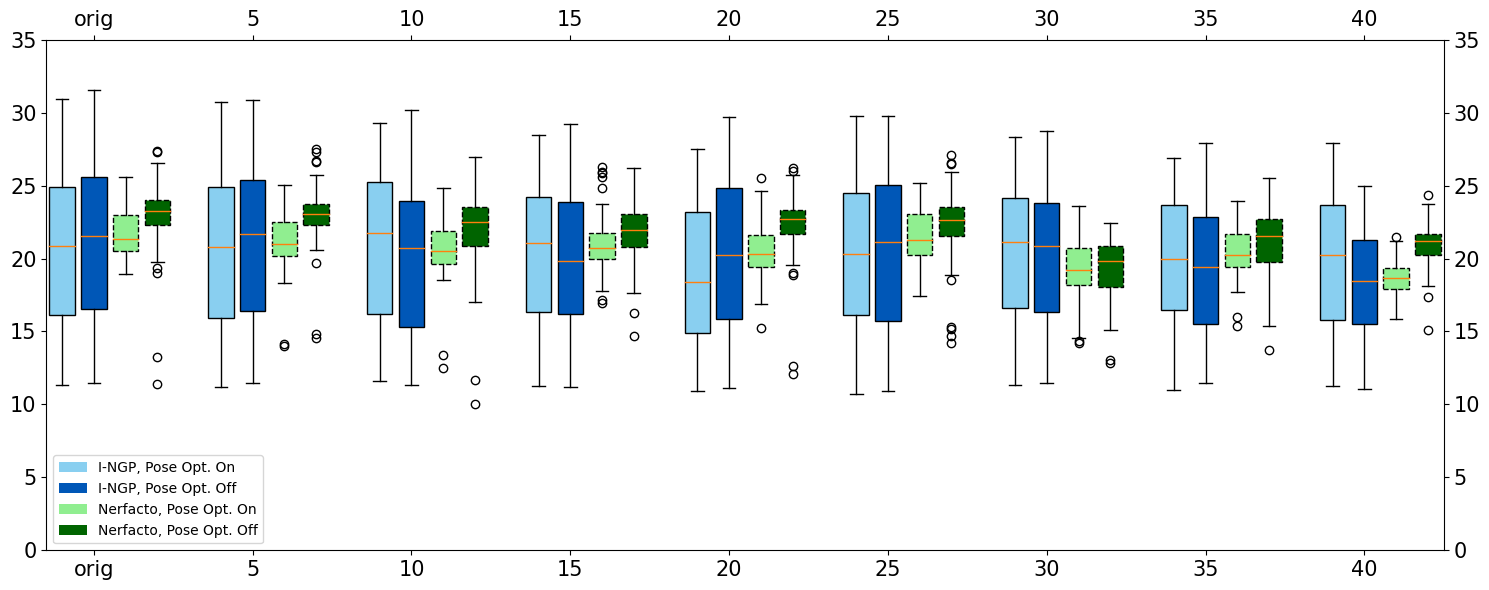

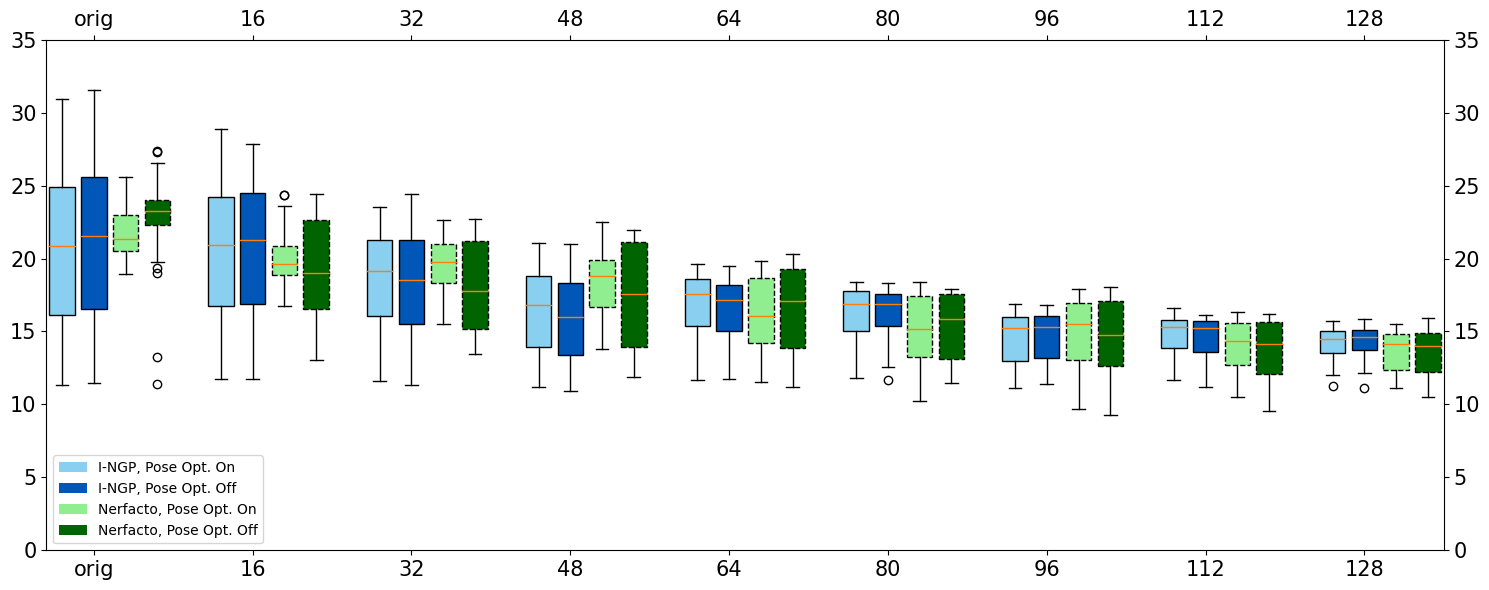

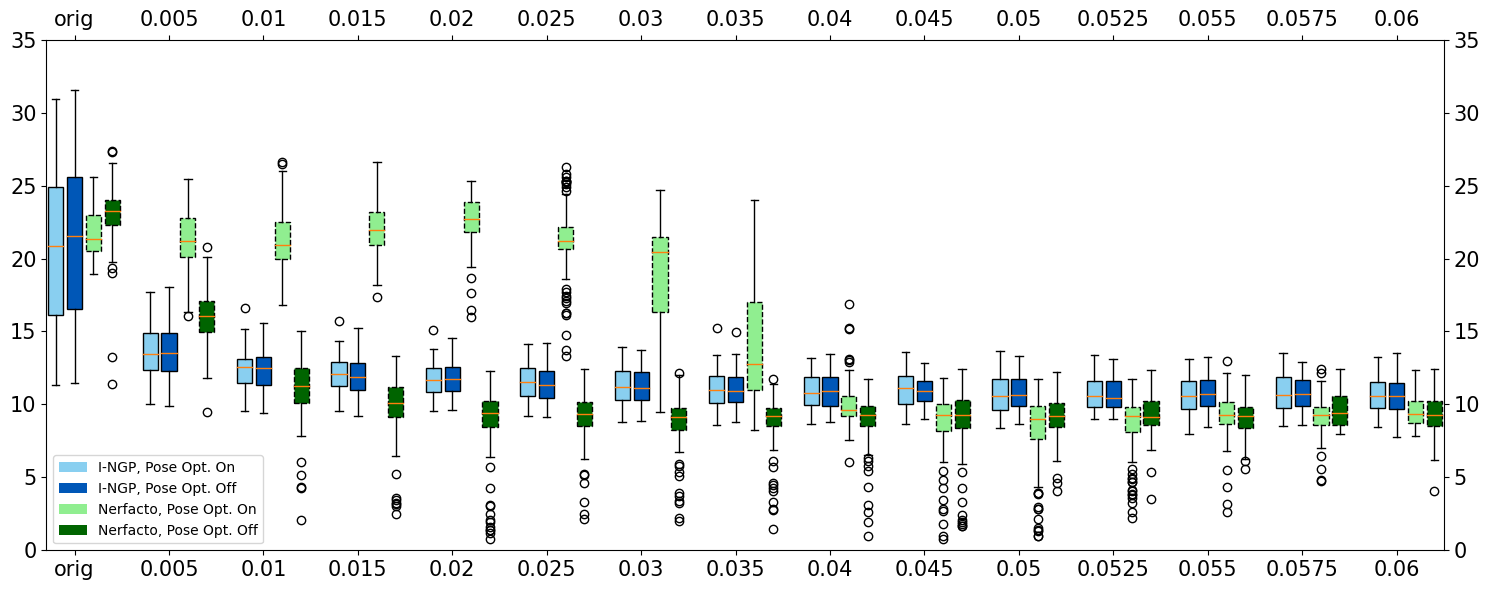

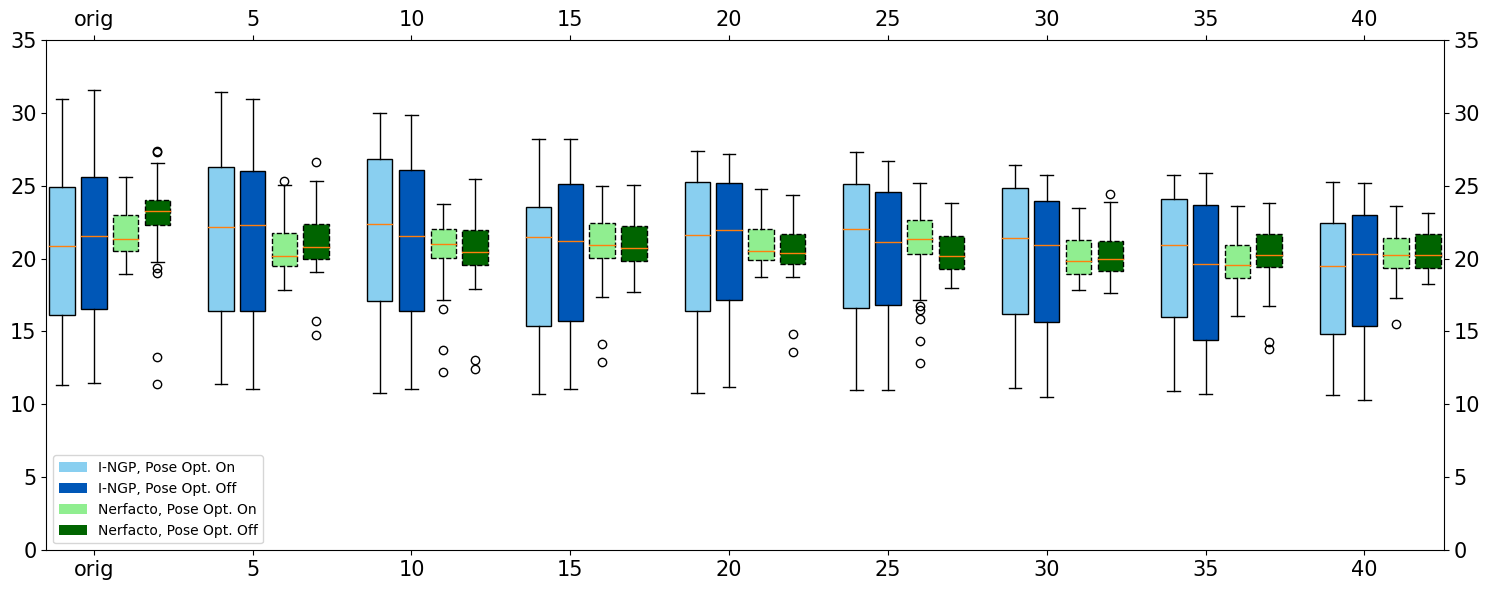

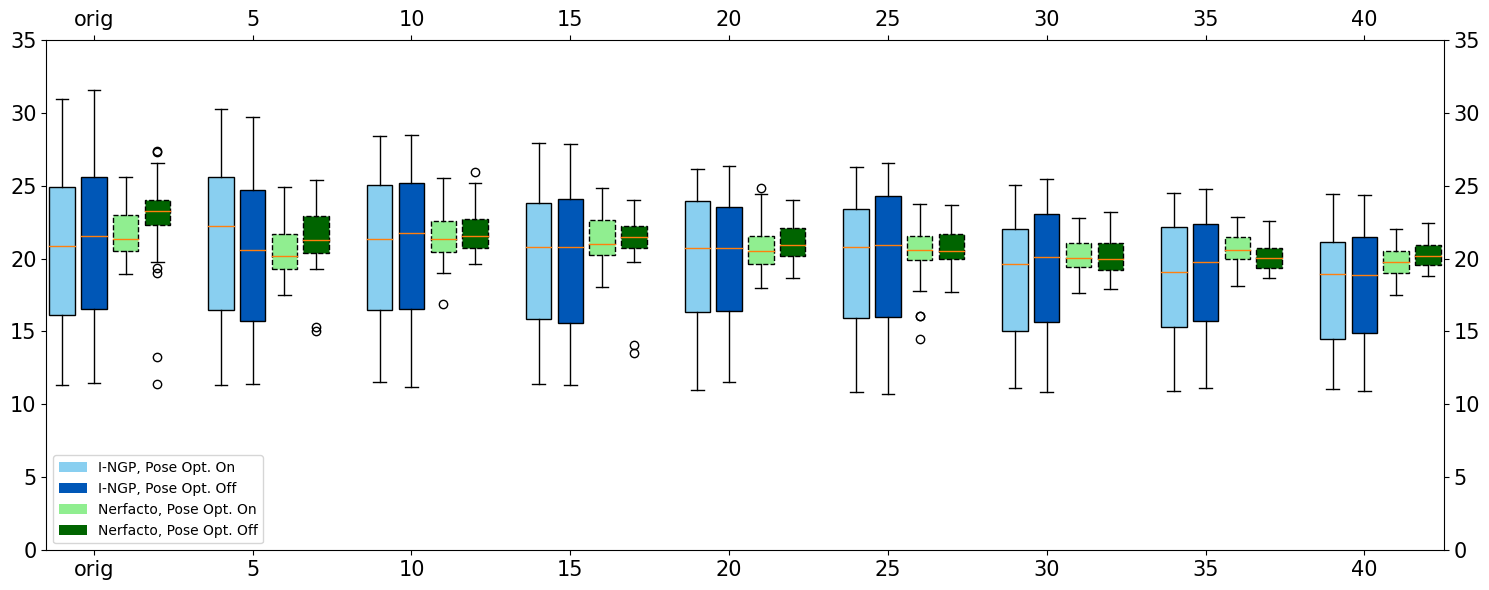

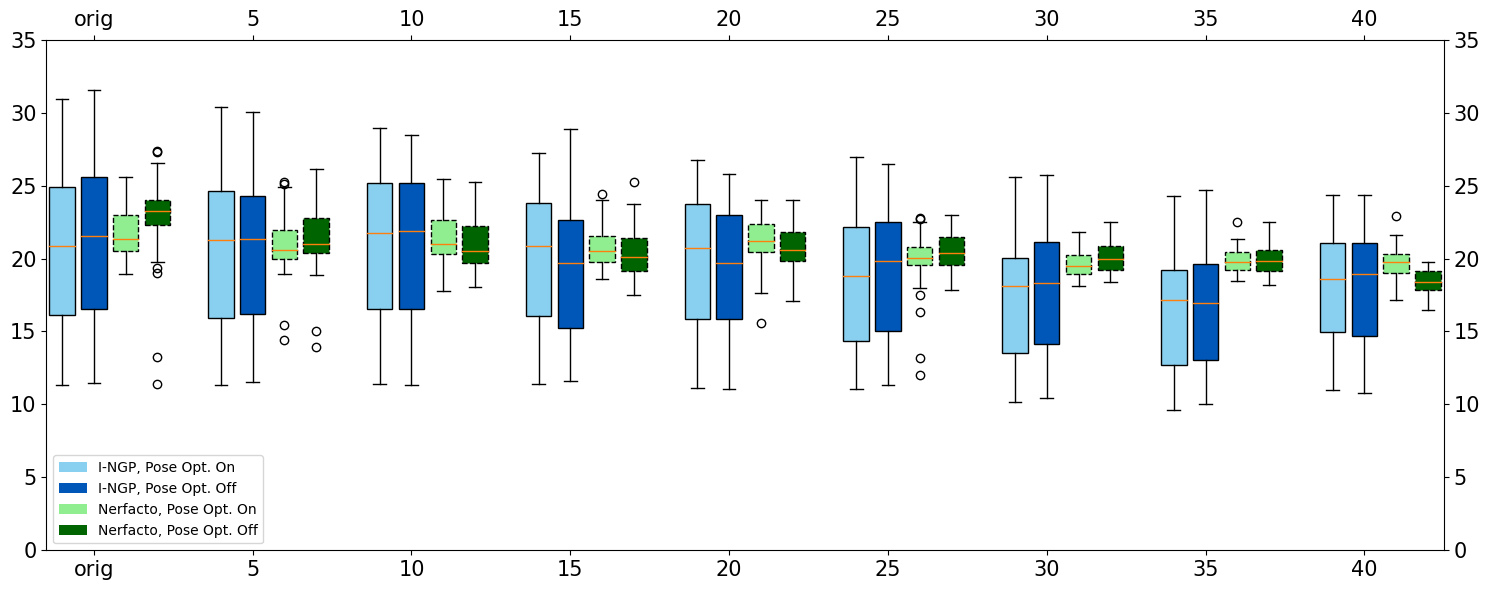

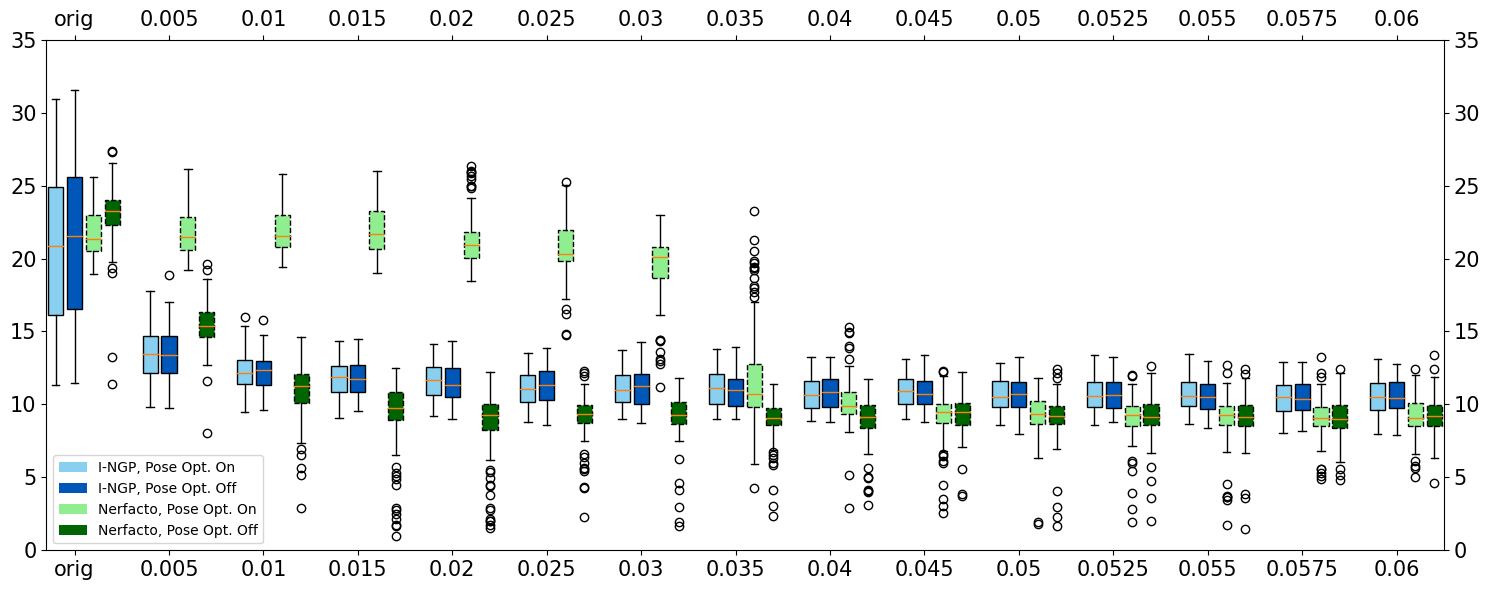

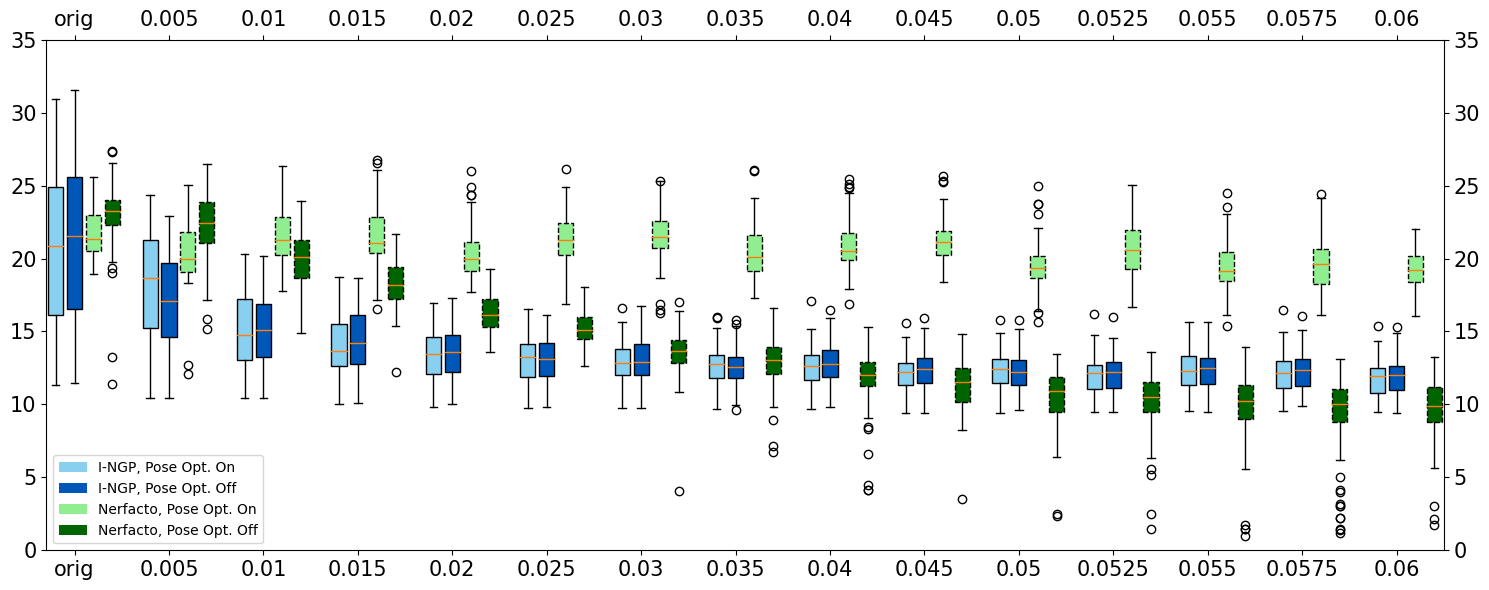

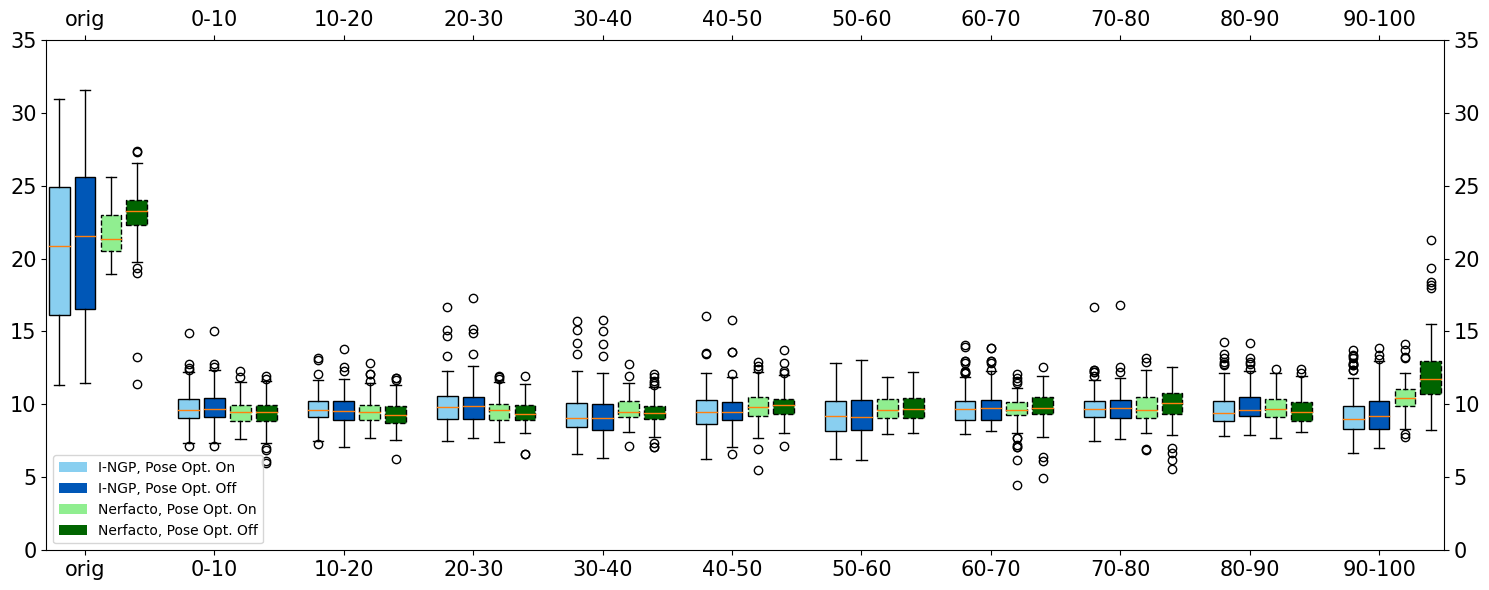

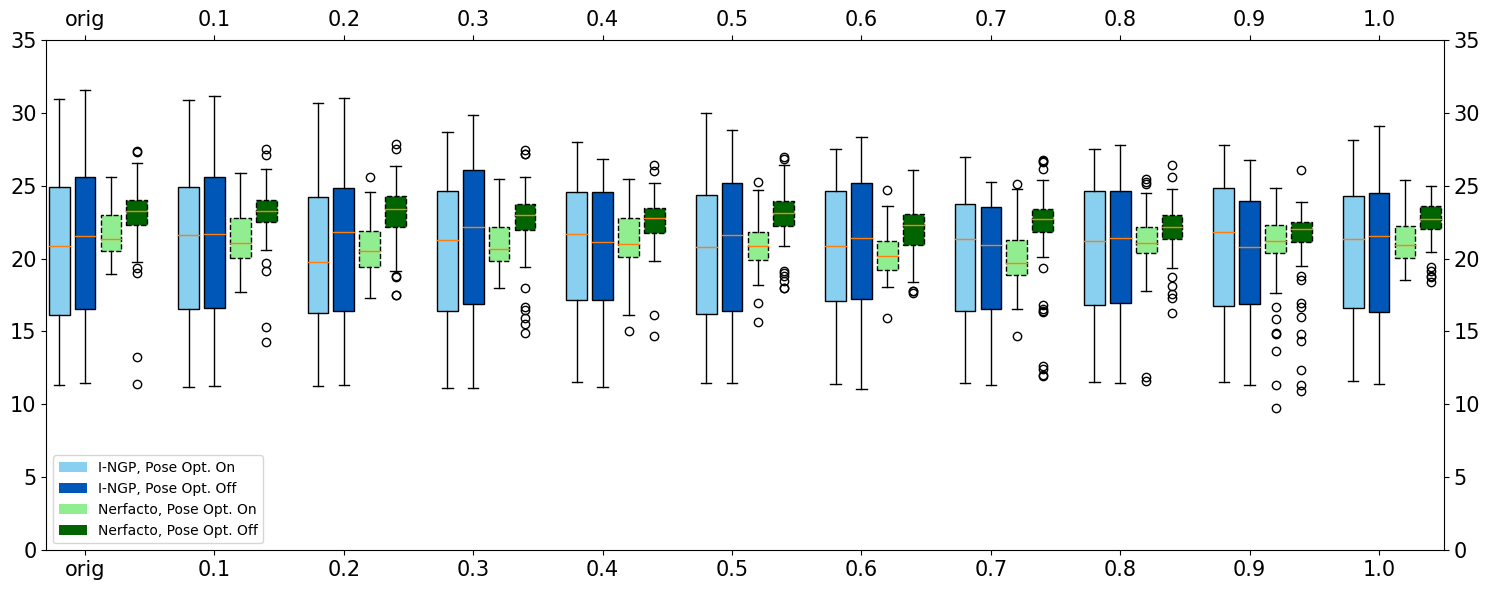

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

keys = psnr_metrics_nerfacto_off.keys()
data_to_plot = {key: [] for key in keys}
for key in keys:
    if key != 'benchmark':
        data_to_plot[key].append([
            psnr_metrics_ngp_on['benchmark'][0], 
            psnr_metrics_ngp_off['benchmark'][0], 
            psnr_metrics_nerfacto_on['benchmark'][0], 
            psnr_metrics_nerfacto_off['benchmark'][0]
        ])        
    for i in range(len(psnr_metrics_ngp_off[key])):
        data_to_plot[key].append([
            psnr_metrics_ngp_on[key][i], 
            psnr_metrics_ngp_off[key][i], 
            psnr_metrics_nerfacto_on[key][i], 
            psnr_metrics_nerfacto_off[key][i]
        ])


data_groups = 4
gap_between_groups = 1
colors = ['#89CFF0', '#0057B7', '#90EE90', '#006400']  # Colors for each boxplot group
# colors = ['#ADD8E6', '#00008B', '#F88379', '#FF6347']  # Light Blue, Dark Blue, Soft Coral, Rich Coral

group_labels = ['I-NGP, Pose Opt. On', 'I-NGP, Pose Opt. Off', 'Nerfacto, Pose Opt. On', 'Nerfacto, Pose Opt. Off']  # Legend labels

for key in keys:
    num_sets = len(data_to_plot[key])
    positions = []
    for set_index in range(num_sets):
        for group_index in range(data_groups):
            position = (set_index * (data_groups + gap_between_groups)) + group_index + 1
            positions.append(position)

    # plt.figure(figsize=(max(10, num_sets * 2), 6))
    plt.figure(figsize=(15,6))
    
    # # Creating boxplots with colors
    bp = plt.boxplot([item for sublist in data_to_plot[key] for item in sublist], 
                     positions=positions, widths=0.8, patch_artist=True)
    for i, box in enumerate(bp['boxes']):
    # Set color for all boxes
        box.set_facecolor(colors[i % data_groups])
        # Apply dashed style to every 3rd and 4th box in each group
        if (i % data_groups == 2) or (i % data_groups == 3):  # 3rd and 4th box in each group
            box.set_linestyle('--')

    for patch, color in zip(bp['boxes'], colors * num_sets):
        patch.set_facecolor(color)
    
    # fontsize = 10 * num_sets/7 # Example dynamic calculation; adjust as needed
    fontsize = 15

    # plt.title(key)
    xticks_positions = [(set_index * (data_groups + gap_between_groups)) + (data_groups / 2) 
                        for set_index in range(num_sets)]
    if key == 'benchmark':
        plt.xticks(xticks_positions, range(1, num_sets + 1), fontsize = fontsize)
    else:
        key = key.replace('lego-', '')
        key = key.replace('-std', '')
        key = key.replace('-percent', '')
        key = key.replace('pns-', '')
        if key == 'noise':
            key = 'noise-std'
        plt.xticks(xticks_positions, xticks[key],fontsize=fontsize)
    # plt.xticks(xticks_positions, range(1, num_sets + 1))


    # plt.xlabel('Set Number')
    # plt.ylabel('PSNR Value')

    # Adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    plt.legend(handles=legend_elements, loc='lower left')
    
    # Adding ticks on top and right
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)
    plt.yticks(fontsize=fontsize)


        # Setting y-axis limits to vmin and vmax
    vmin, vmax = 0, 35  # Adjust these values as needed for your data
    ax.set_ylim([vmin, vmax])
        # Drawing the horizontal line at y=13
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    # Creating the horizontal line and adding to legend

    # plt.axhline(y=13, color='r', linestyle='--')

    # Creating the horizontal line legend entry
    # horizontal_line = Line2D([], [], color='r', linestyle='--', label='Threshold at 13')

    # Creating and adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    # legend_elements.append(horizontal_line)
    plt.legend(handles=legend_elements, loc='lower left')

    save_dir = r'C:\Stuff\Results\plots\lego_plots'
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'PSNR_lego_{key}.pdf'), format='pdf', dpi=300)
    
    plt.show()


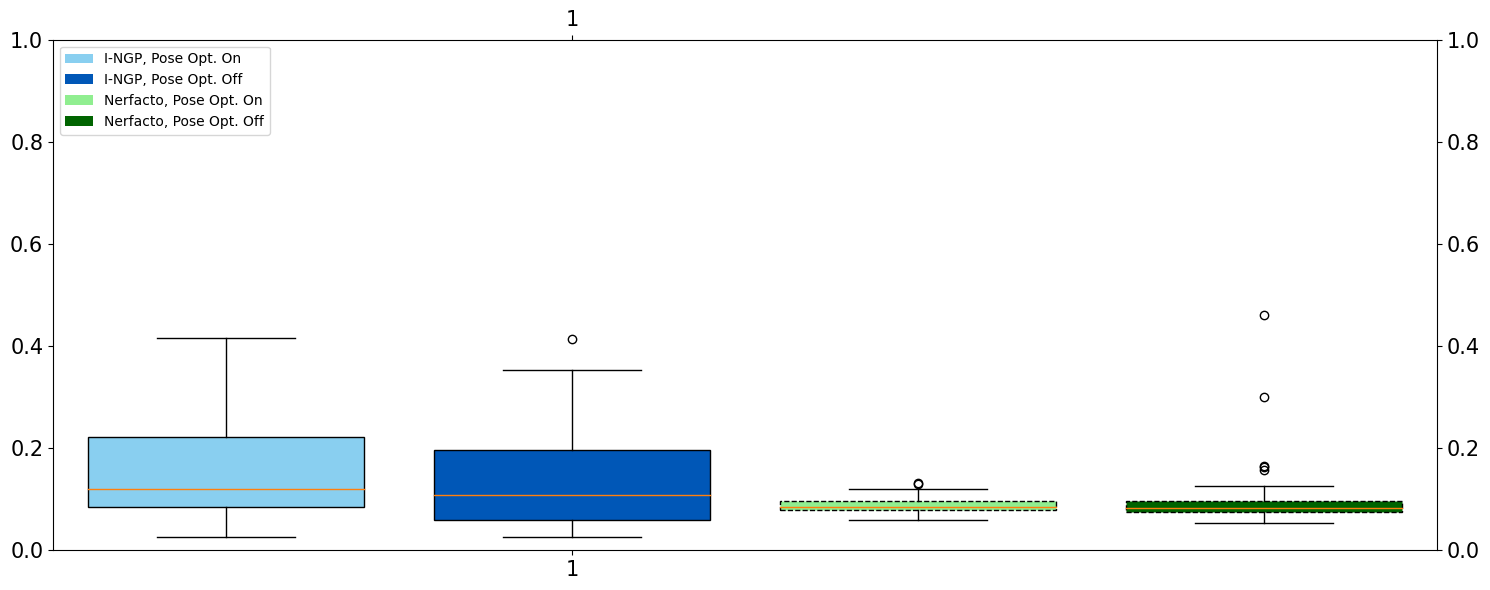

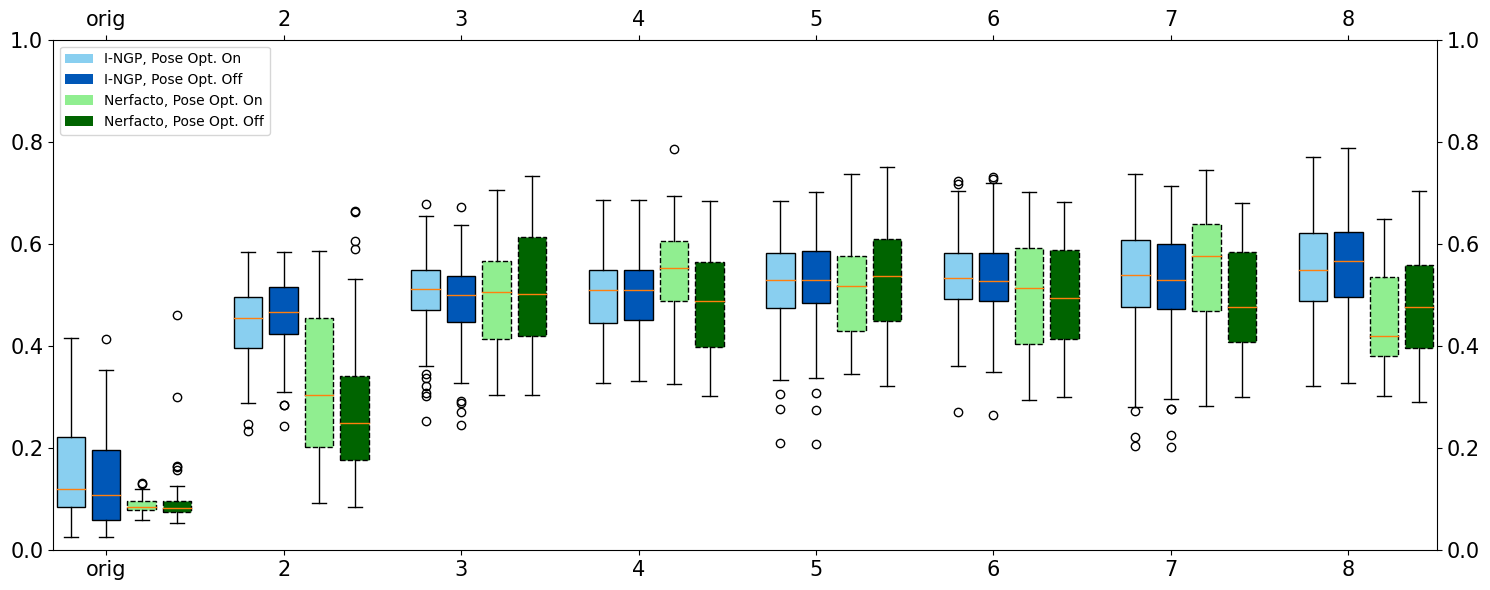

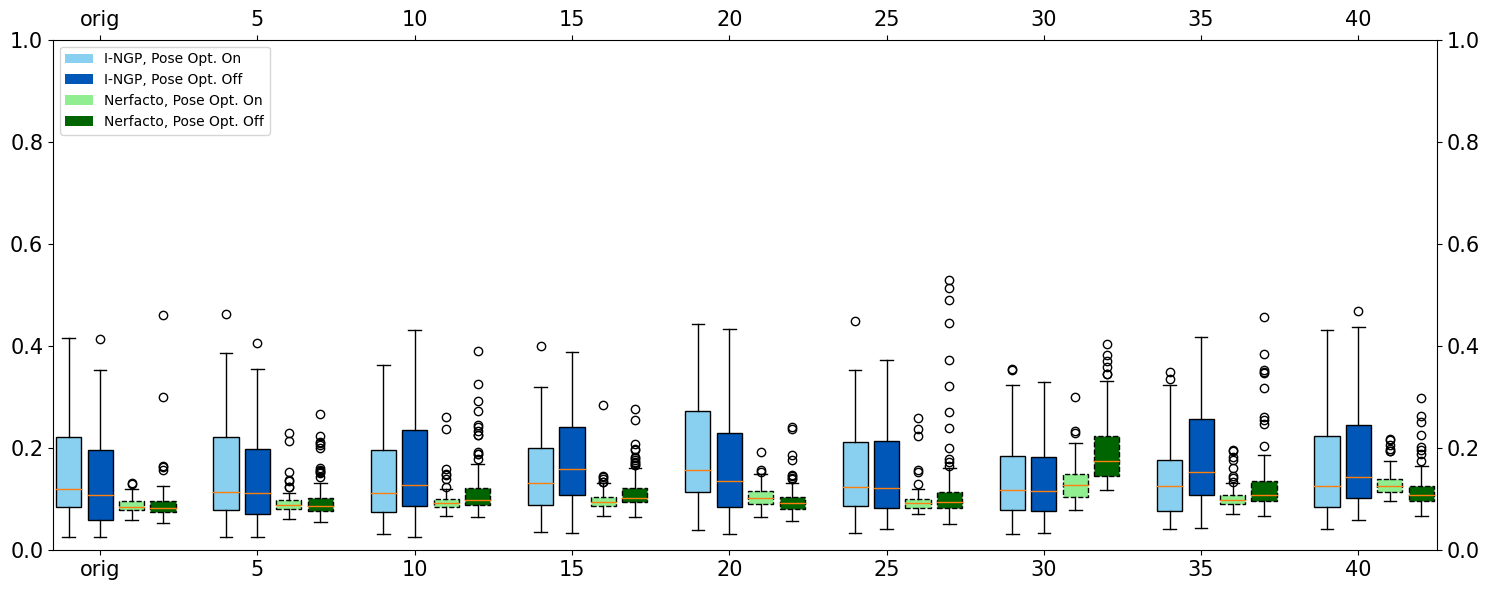

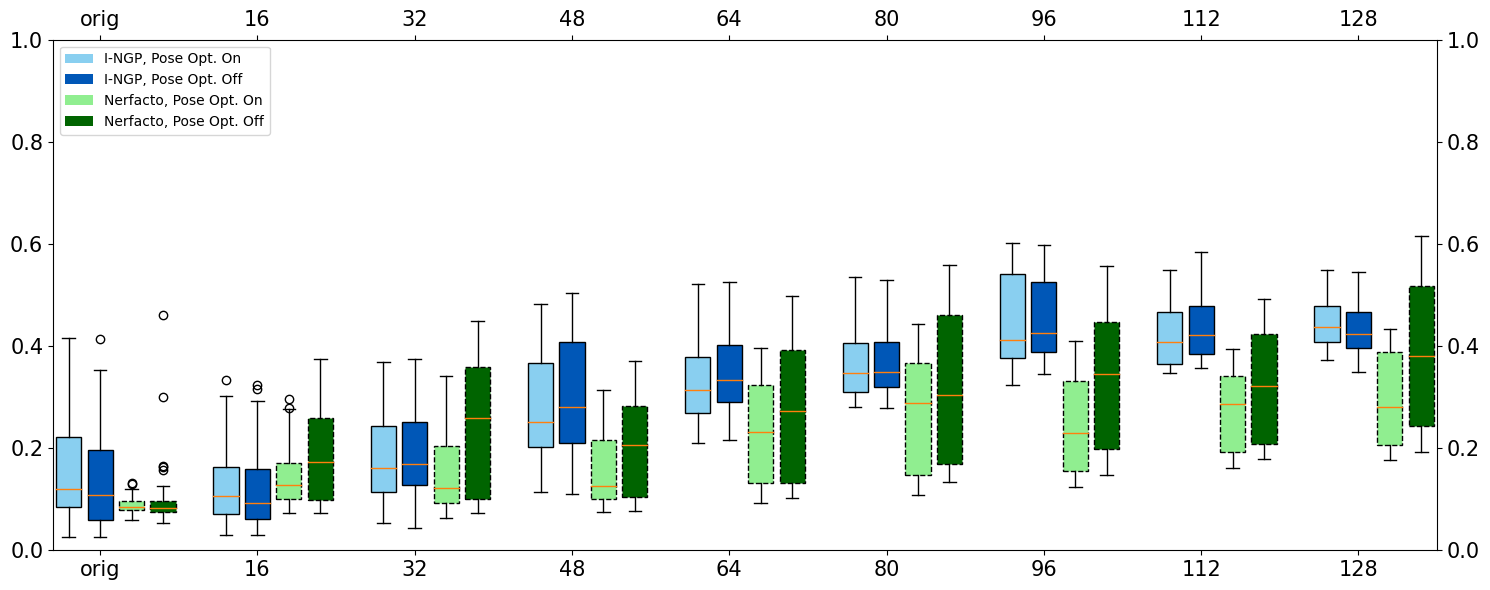

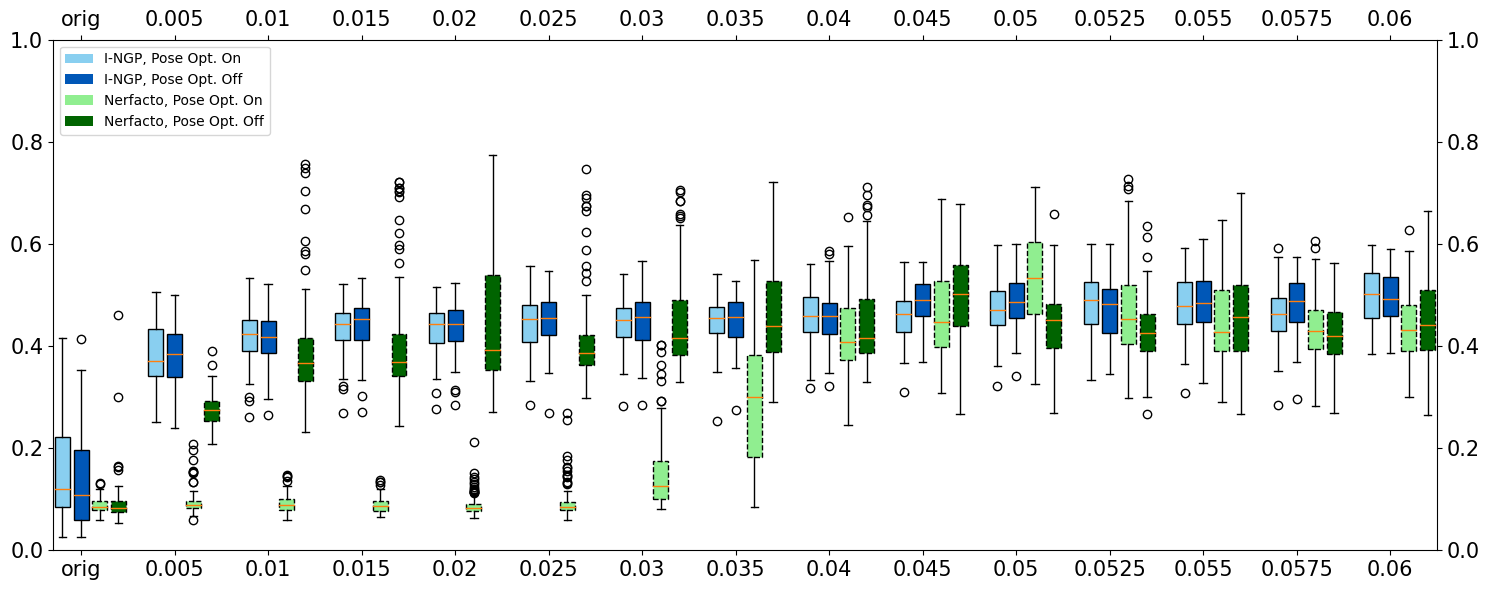

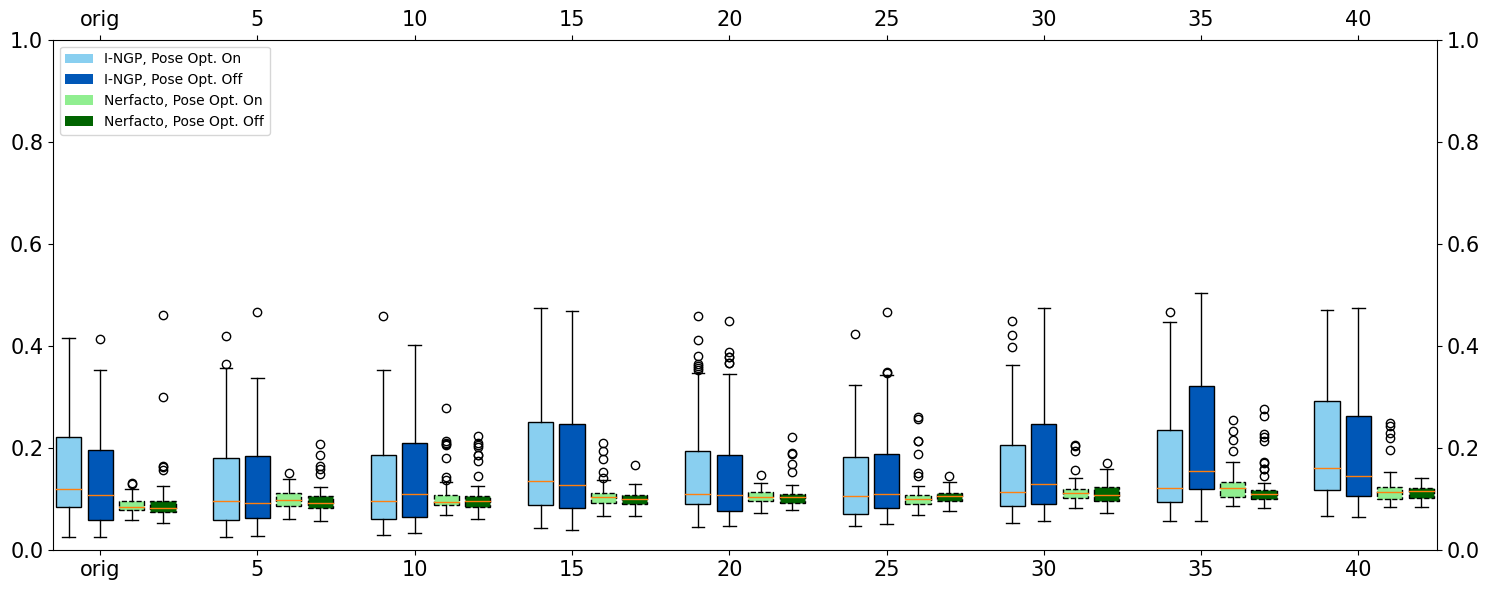

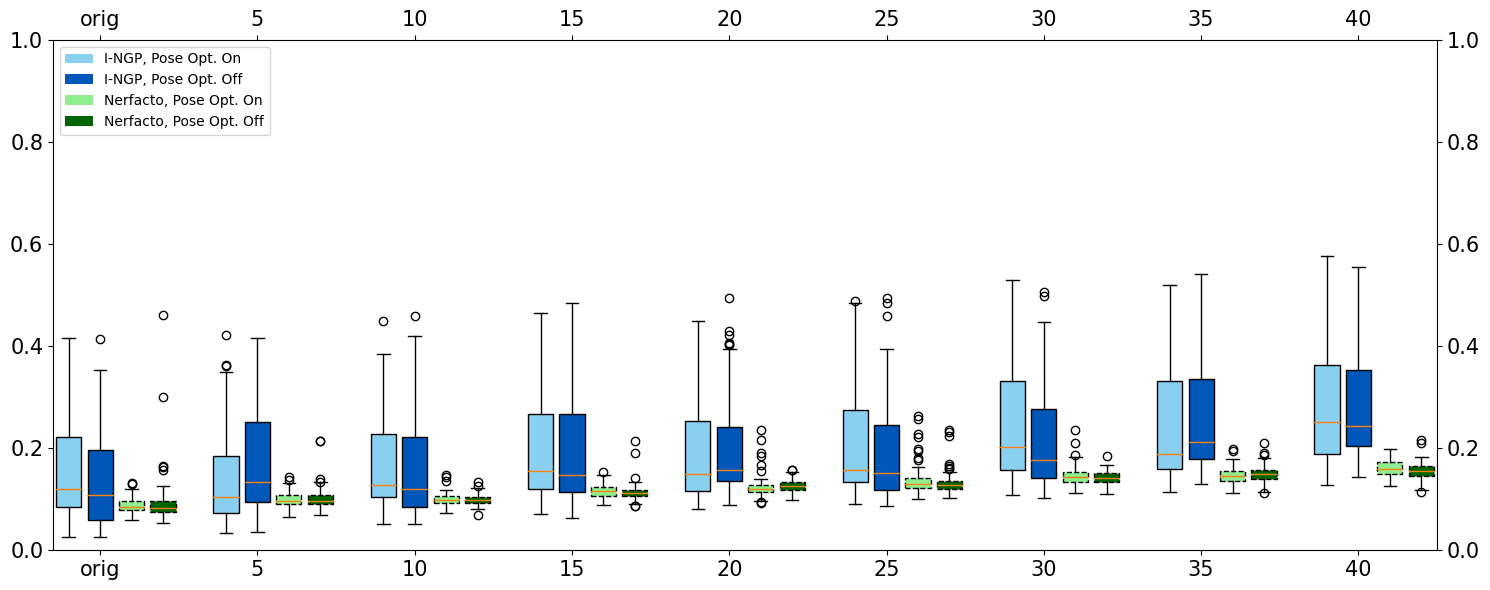

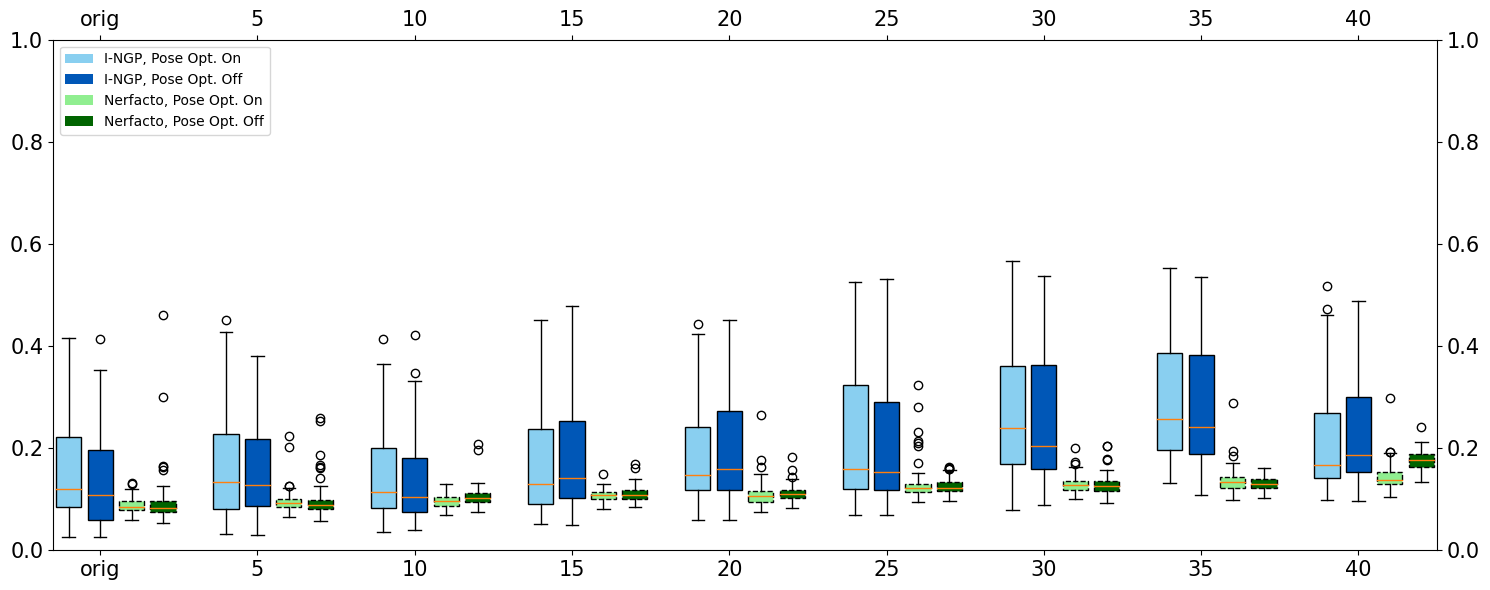

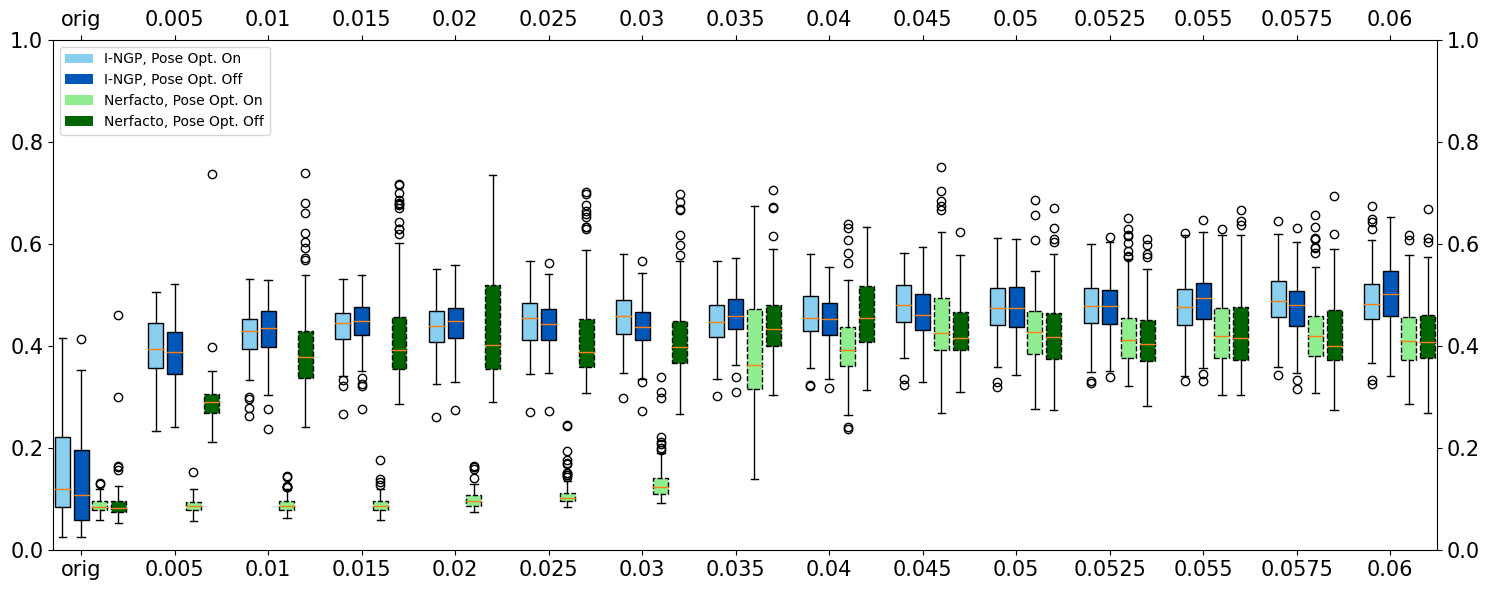

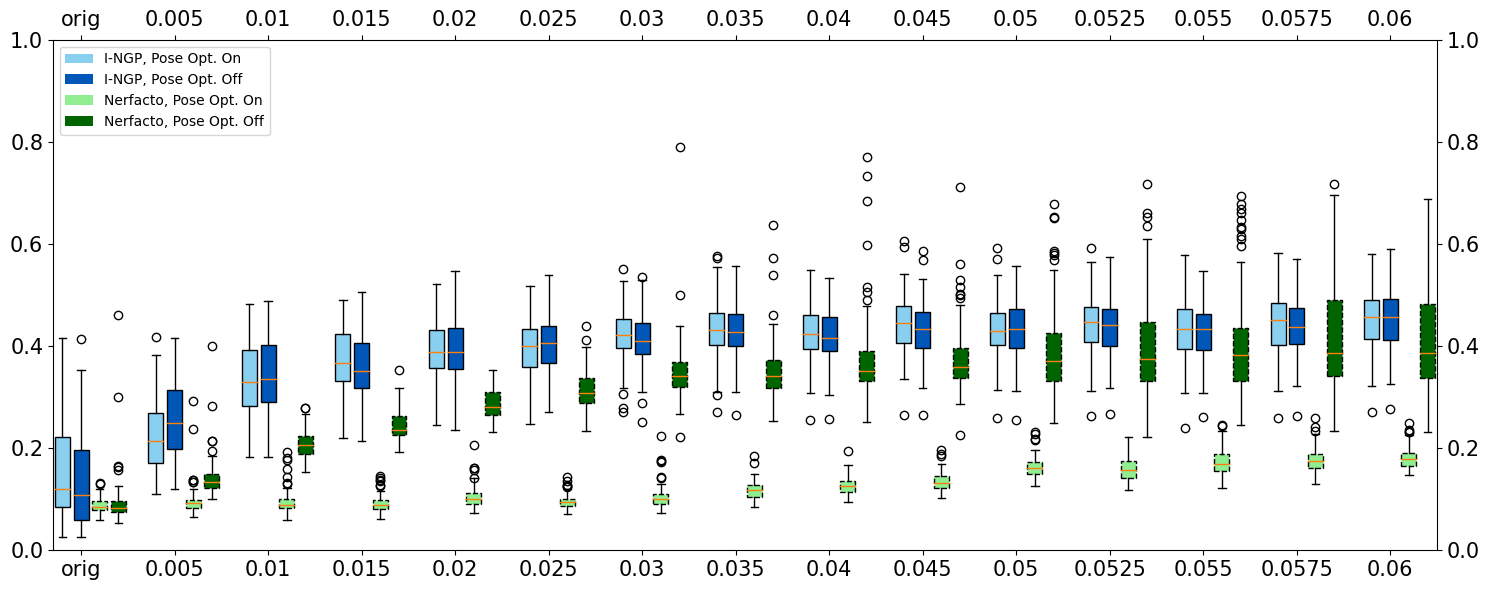

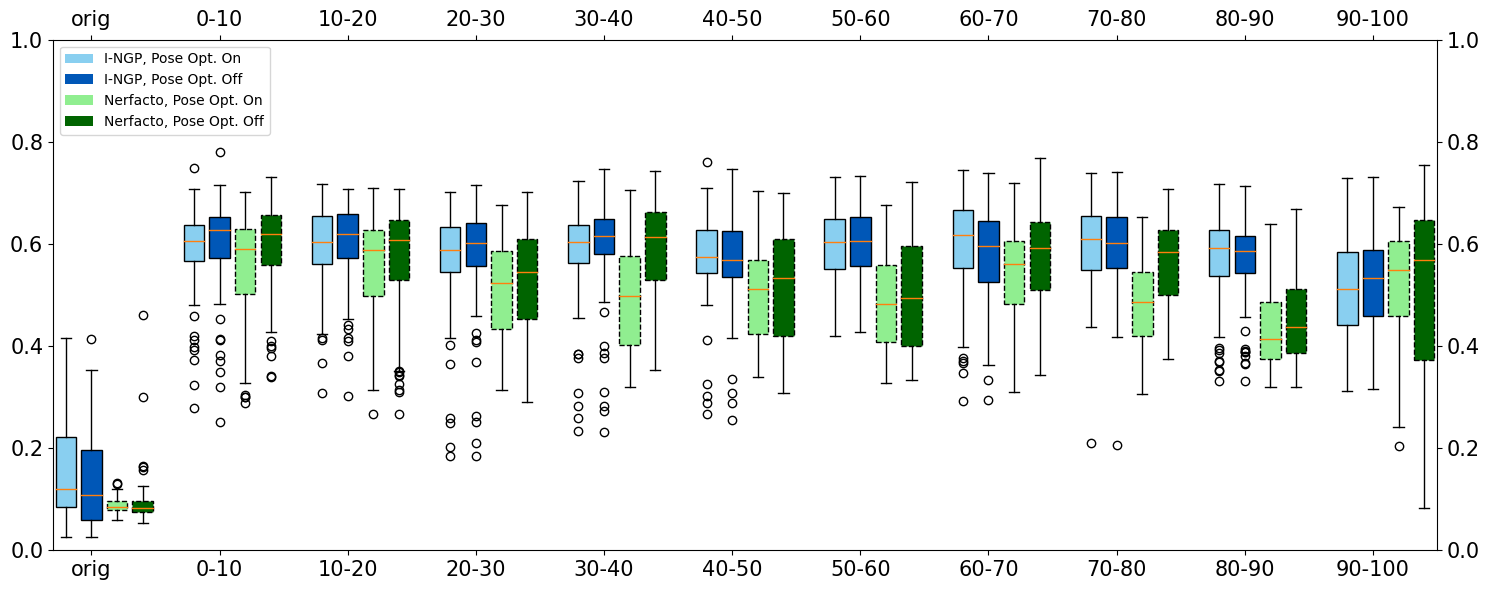

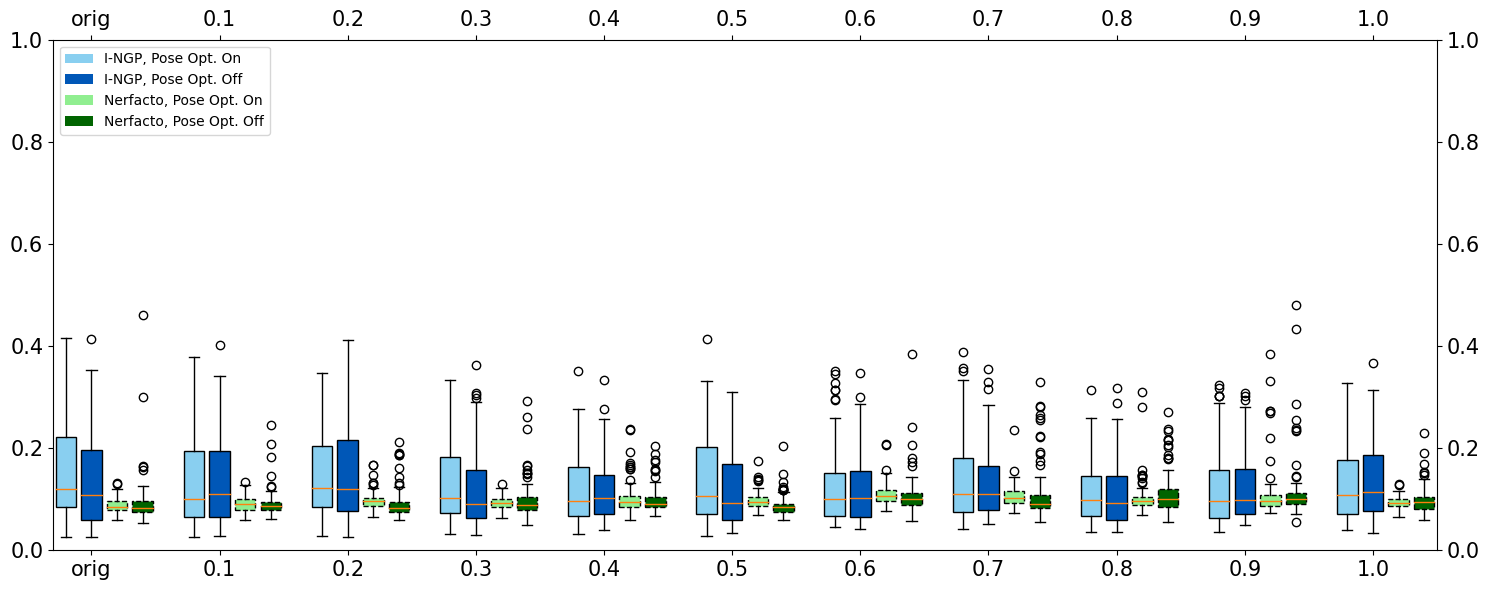

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

keys = lpips_metrics_nerfacto_off.keys()
data_to_plot = {key: [] for key in keys}
for key in keys:
    if key != 'benchmark':
        data_to_plot[key].append([
            lpips_metrics_ngp_on['benchmark'][0], 
            lpips_metrics_ngp_off['benchmark'][0], 
            lpips_metrics_nerfacto_on['benchmark'][0], 
            lpips_metrics_nerfacto_off['benchmark'][0]
        ])        
    for i in range(len(lpips_metrics_ngp_off[key])):
        data_to_plot[key].append([
            lpips_metrics_ngp_on[key][i], 
            lpips_metrics_ngp_off[key][i], 
            lpips_metrics_nerfacto_on[key][i], 
            lpips_metrics_nerfacto_off[key][i]
        ])


data_groups = 4
gap_between_groups = 1
colors = ['#89CFF0', '#0057B7', '#90EE90', '#006400']  # Colors for each boxplot group
# colors = ['#ADD8E6', '#00008B', '#F88379', '#FF6347']  # Light Blue, Dark Blue, Soft Coral, Rich Coral

group_labels = ['I-NGP, Pose Opt. On', 'I-NGP, Pose Opt. Off', 'Nerfacto, Pose Opt. On', 'Nerfacto, Pose Opt. Off']  # Legend labels

for key in keys:
    num_sets = len(data_to_plot[key])
    positions = []
    for set_index in range(num_sets):
        for group_index in range(data_groups):
            position = (set_index * (data_groups + gap_between_groups)) + group_index + 1
            positions.append(position)

    # plt.figure(figsize=(max(10, num_sets * 2), 6))
    plt.figure(figsize=(15,6))
    
    # # Creating boxplots with colors
    bp = plt.boxplot([item for sublist in data_to_plot[key] for item in sublist], 
                     positions=positions, widths=0.8, patch_artist=True)
    for i, box in enumerate(bp['boxes']):
    # Set color for all boxes
        box.set_facecolor(colors[i % data_groups])
        # Apply dashed style to every 3rd and 4th box in each group
        if (i % data_groups == 2) or (i % data_groups == 3):  # 3rd and 4th box in each group
            box.set_linestyle('--')

    for patch, color in zip(bp['boxes'], colors * num_sets):
        patch.set_facecolor(color)
    
    # fontsize = 10 * num_sets/7 # Example dynamic calculation; adjust as needed
    fontsize = 15

    # plt.title(key)
    xticks_positions = [(set_index * (data_groups + gap_between_groups)) + (data_groups / 2) 
                        for set_index in range(num_sets)]
    if key == 'benchmark':
        plt.xticks(xticks_positions, range(1, num_sets + 1), fontsize = fontsize)
    else:
        key = key.replace('lego-', '')
        key = key.replace('-std', '')
        key = key.replace('-percent', '')
        key = key.replace('pns-', '')
        if key == 'noise':
            key = 'noise-std'
        plt.xticks(xticks_positions, xticks[key],fontsize=fontsize)
    # plt.xticks(xticks_positions, range(1, num_sets + 1))


    # plt.xlabel('Set Number')
    # plt.ylabel('lpips Value')

    # Adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    plt.legend(handles=legend_elements, loc='lower left')
    
    # Adding ticks on top and right
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)
    plt.yticks(fontsize=fontsize)


        # Setting y-axis limits to vmin and vmax
    vmin, vmax = 0, 1  # Adjust these values as needed for your data
    ax.set_ylim([vmin, vmax])
        # Drawing the horizontal line at y=13
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    # Creating the horizontal line and adding to legend

    plt.axhline(y=13, color='r', linestyle='--')

    # Creating the horizontal line legend entry
    # horizontal_line = Line2D([], [], color='r', linestyle='--', label='Threshold at 13')

    # Creating and adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    # legend_elements.append(horizontal_line)
    plt.legend(handles=legend_elements, loc='upper left')

    save_dir = r'C:\Stuff\Results\plots\lego_plots'
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'LPIPS_lego_{key}.pdf'), format='pdf', dpi=300)
    
    plt.show()


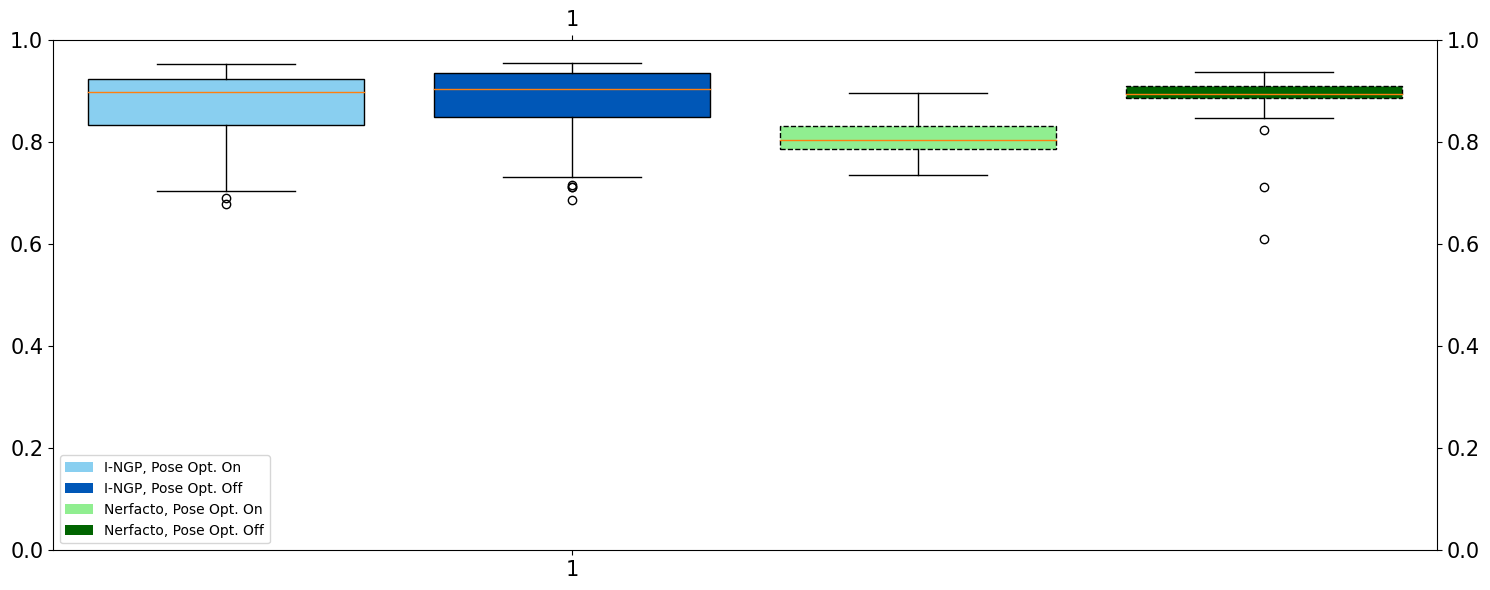

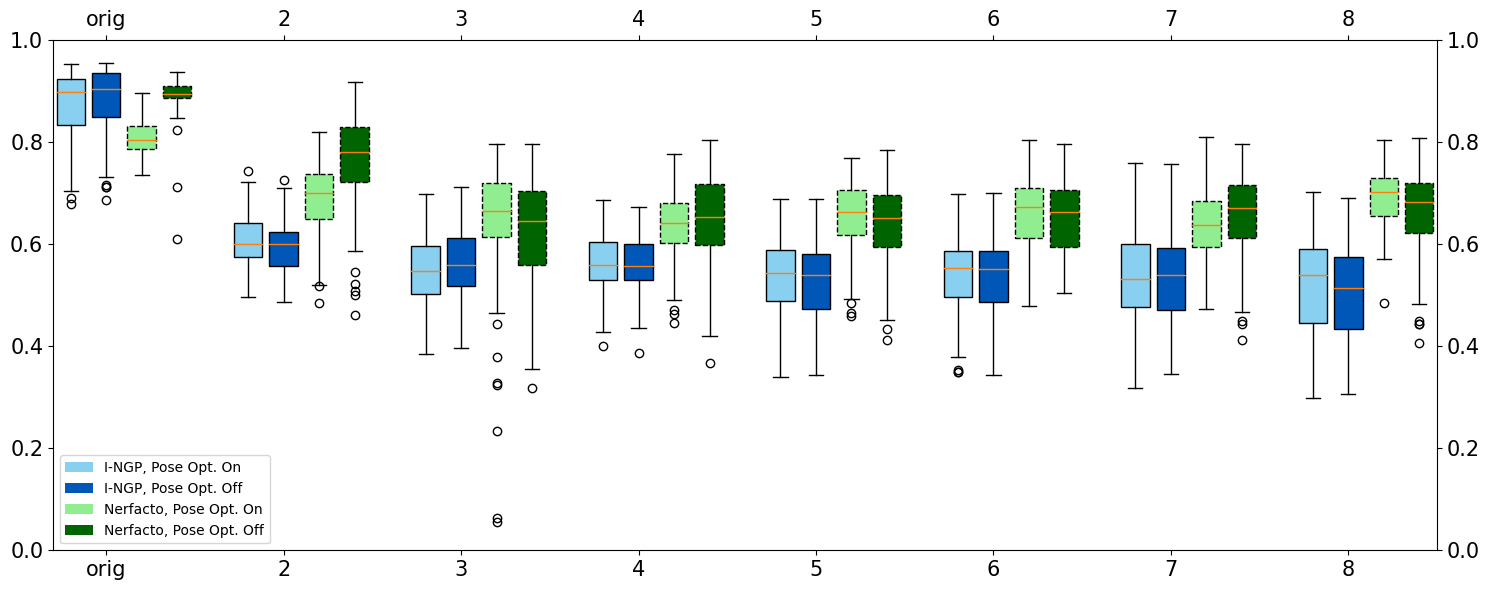

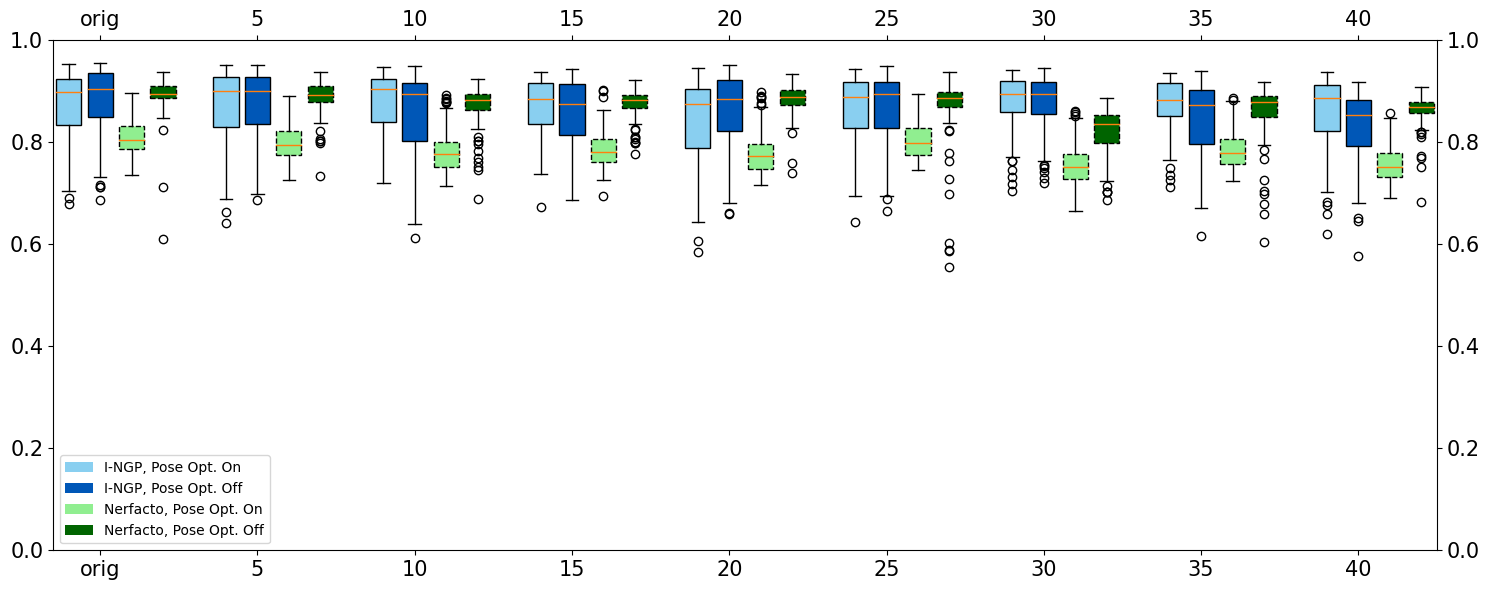

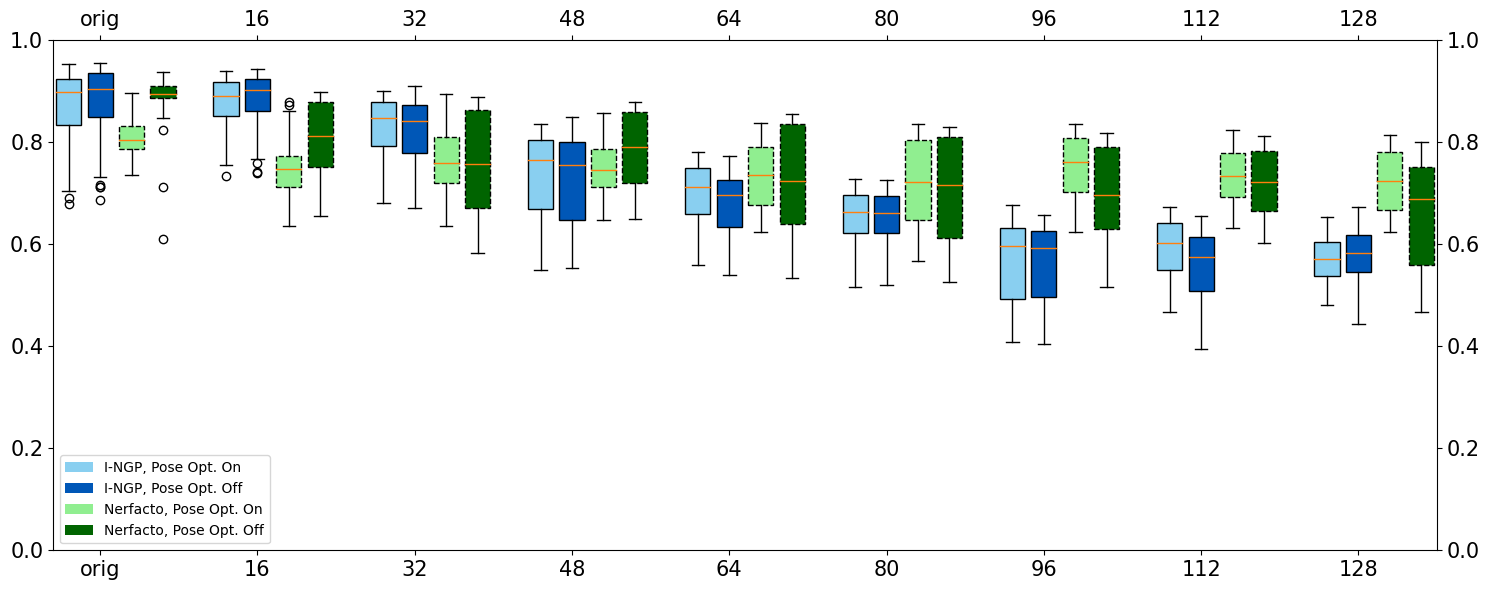

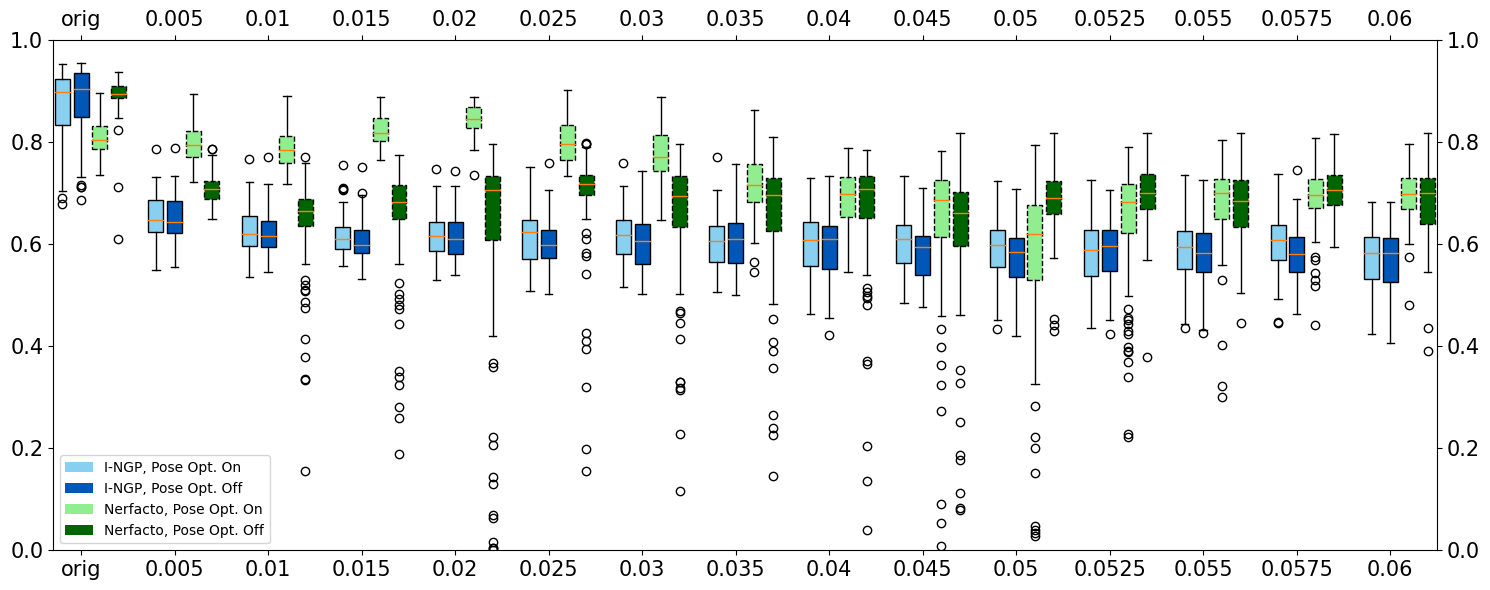

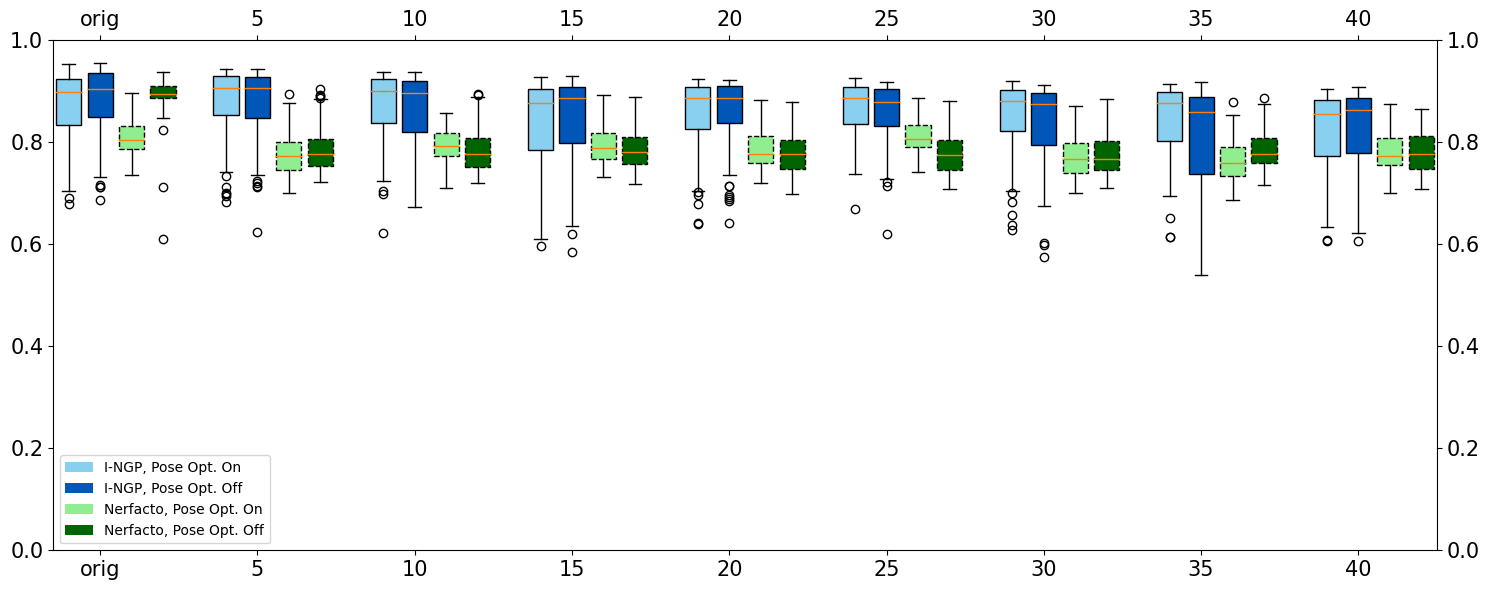

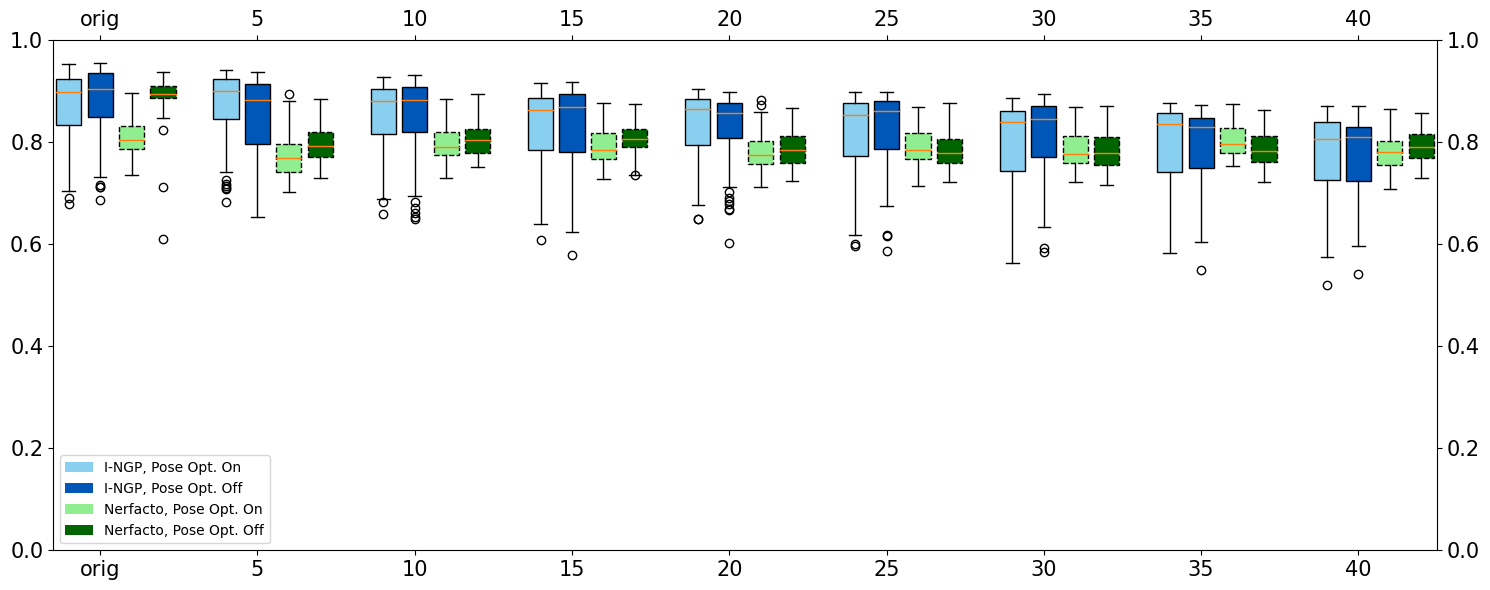

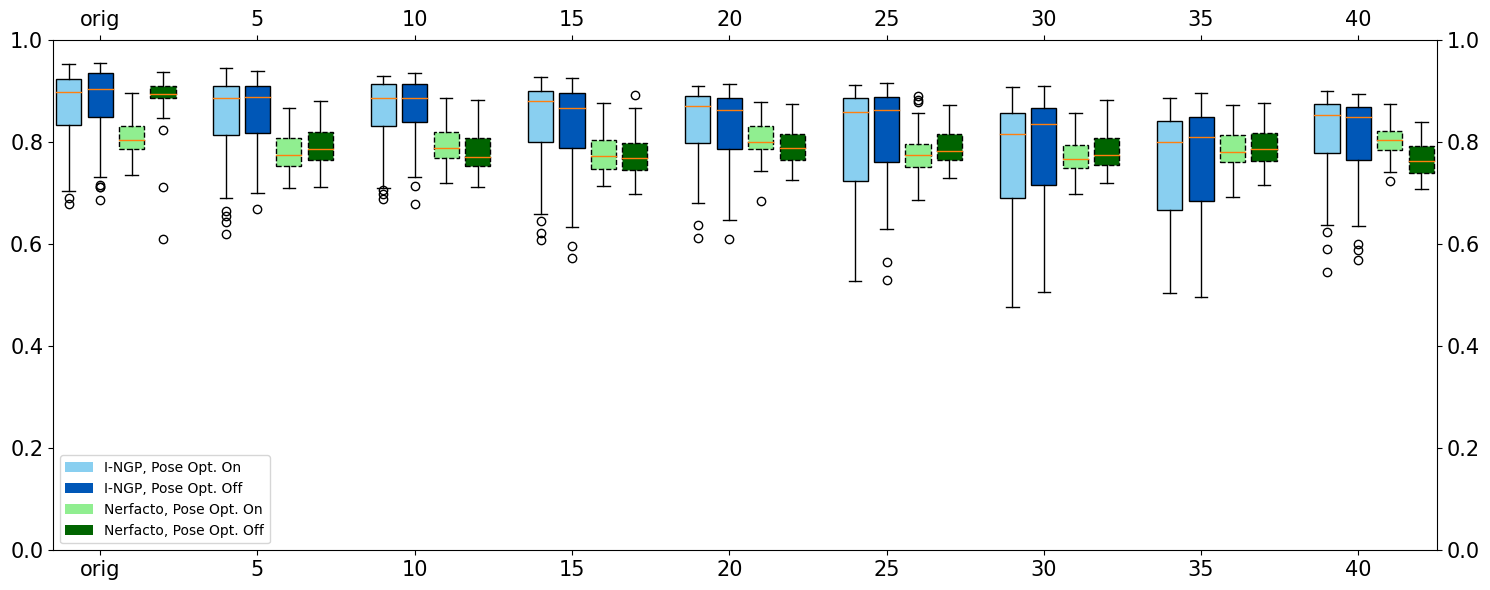

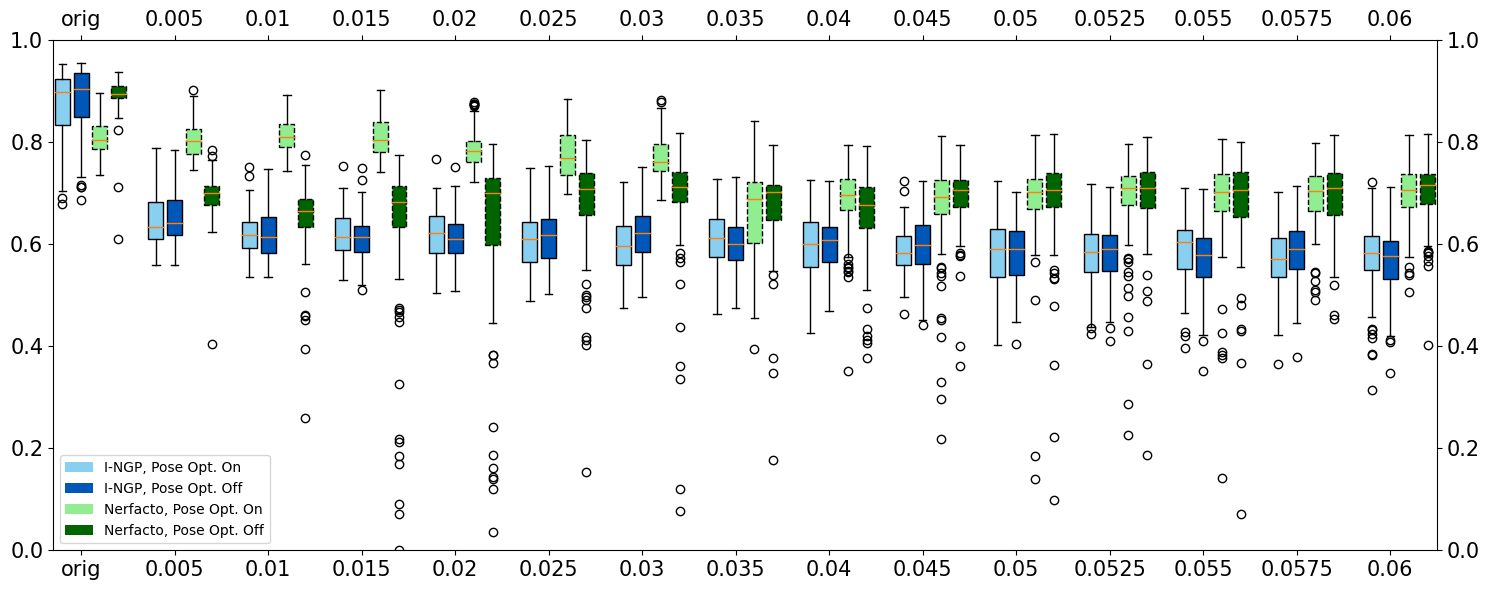

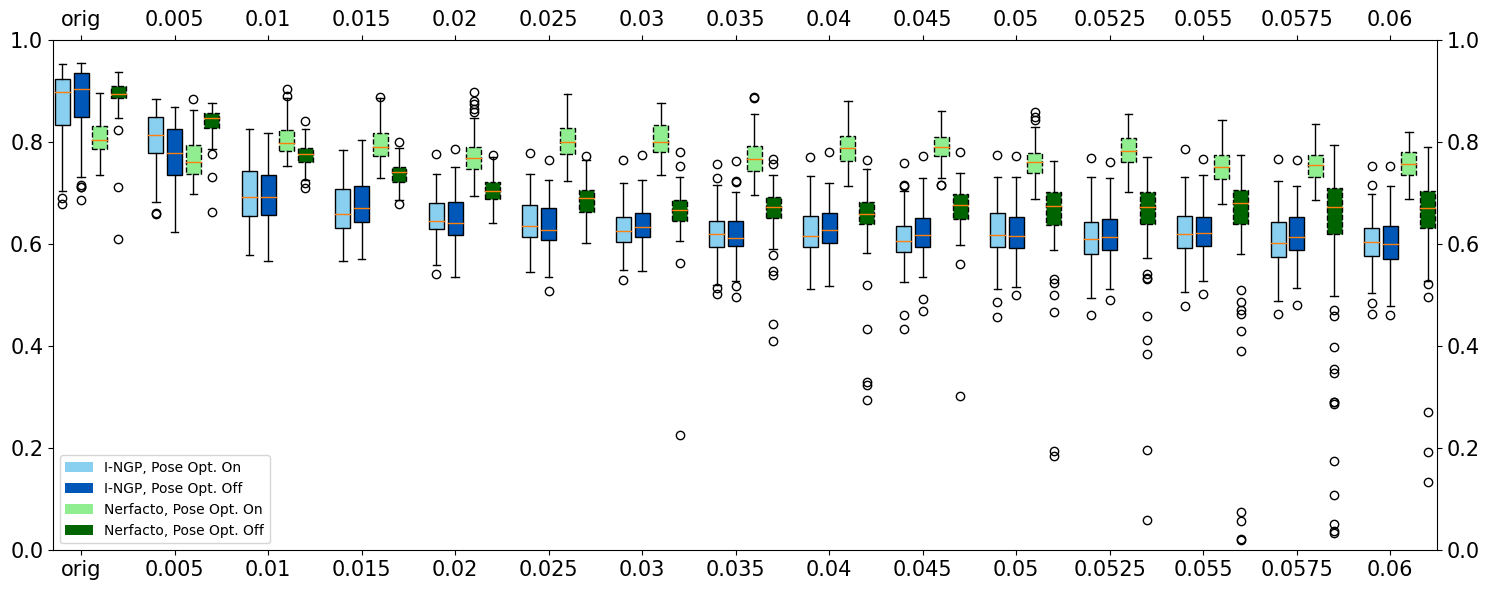

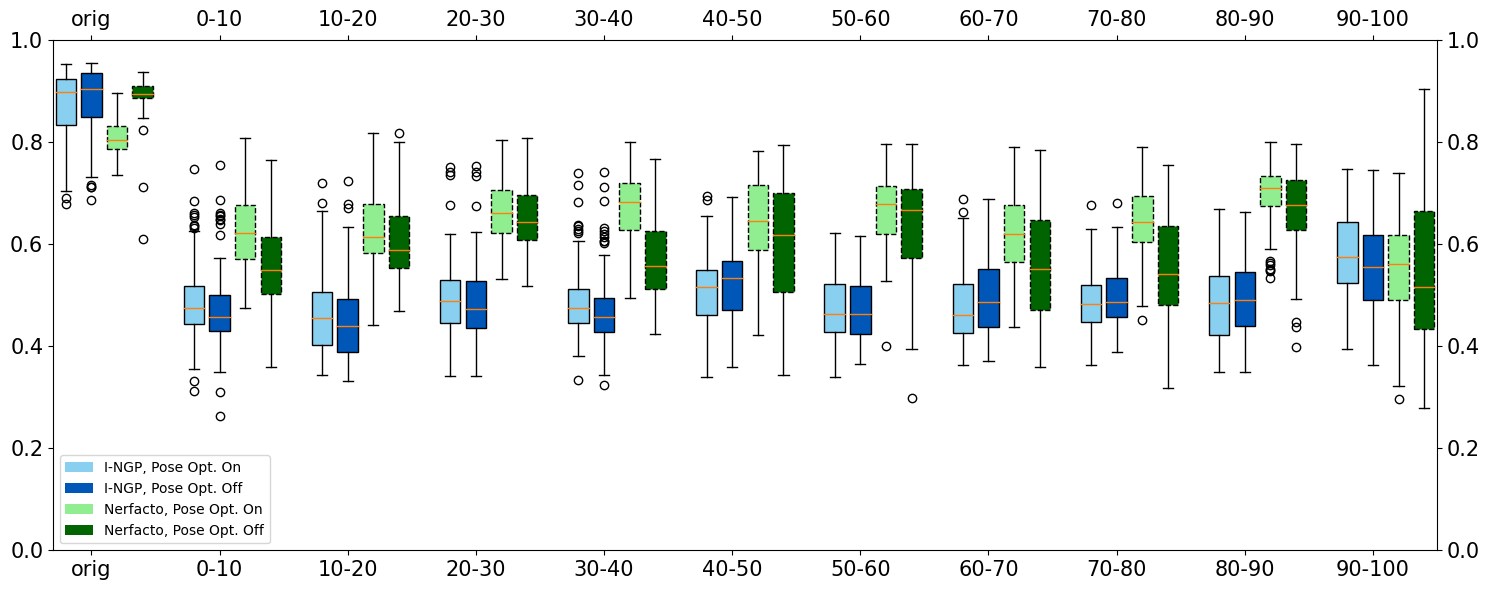

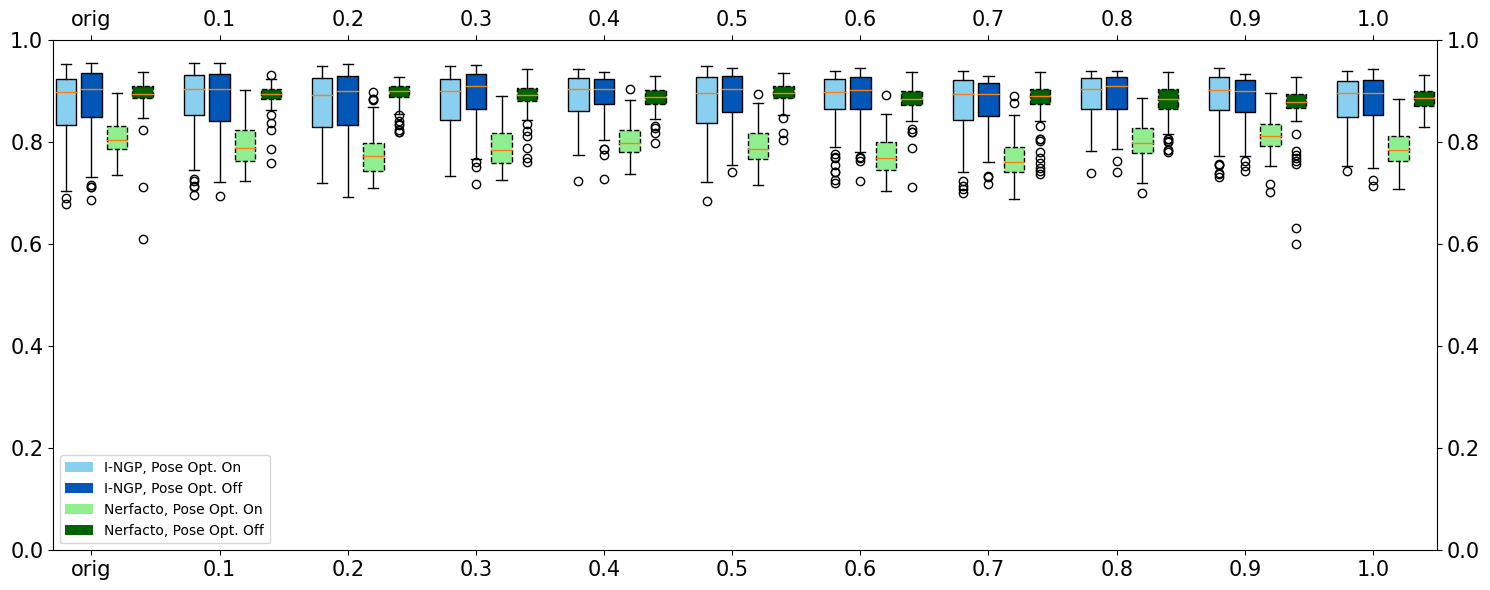

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

keys = ssim_metrics_nerfacto_off.keys()
data_to_plot = {key: [] for key in keys}
for key in keys:
    if key != 'benchmark':
        data_to_plot[key].append([
            ssim_metrics_ngp_on['benchmark'][0], 
            ssim_metrics_ngp_off['benchmark'][0], 
            ssim_metrics_nerfacto_on['benchmark'][0], 
            ssim_metrics_nerfacto_off['benchmark'][0]
        ])        
    for i in range(len(ssim_metrics_ngp_off[key])):
        data_to_plot[key].append([
            ssim_metrics_ngp_on[key][i], 
            ssim_metrics_ngp_off[key][i], 
            ssim_metrics_nerfacto_on[key][i], 
            ssim_metrics_nerfacto_off[key][i]
        ])


data_groups = 4
gap_between_groups = 1
colors = ['#89CFF0', '#0057B7', '#90EE90', '#006400']  # Colors for each boxplot group
# colors = ['#ADD8E6', '#00008B', '#F88379', '#FF6347']  # Light Blue, Dark Blue, Soft Coral, Rich Coral

group_labels = ['I-NGP, Pose Opt. On', 'I-NGP, Pose Opt. Off', 'Nerfacto, Pose Opt. On', 'Nerfacto, Pose Opt. Off']  # Legend labels

for key in keys:
    num_sets = len(data_to_plot[key])
    positions = []
    for set_index in range(num_sets):
        for group_index in range(data_groups):
            position = (set_index * (data_groups + gap_between_groups)) + group_index + 1
            positions.append(position)

    # plt.figure(figsize=(max(10, num_sets * 2), 6))
    plt.figure(figsize=(15,6))
    
    # # Creating boxplots with colors
    bp = plt.boxplot([item for sublist in data_to_plot[key] for item in sublist], 
                     positions=positions, widths=0.8, patch_artist=True)
    for i, box in enumerate(bp['boxes']):
    # Set color for all boxes
        box.set_facecolor(colors[i % data_groups])
        # Apply dashed style to every 3rd and 4th box in each group
        if (i % data_groups == 2) or (i % data_groups == 3):  # 3rd and 4th box in each group
            box.set_linestyle('--')

    for patch, color in zip(bp['boxes'], colors * num_sets):
        patch.set_facecolor(color)
    
    # fontsize = 10 * num_sets/7 # Example dynamic calculation; adjust as needed
    fontsize = 15

    # plt.title(key)
    xticks_positions = [(set_index * (data_groups + gap_between_groups)) + (data_groups / 2) 
                        for set_index in range(num_sets)]
    if key == 'benchmark':
        plt.xticks(xticks_positions, range(1, num_sets + 1), fontsize = fontsize)
    else:
        key = key.replace('lego-', '')
        key = key.replace('-std', '')
        key = key.replace('-percent', '')
        key = key.replace('pns-', '')
        if key == 'noise':
            key = 'noise-std'
        plt.xticks(xticks_positions, xticks[key],fontsize=fontsize)
    # plt.xticks(xticks_positions, range(1, num_sets + 1))


    # plt.xlabel('Set Number')
    # plt.ylabel('ssim Value')

    # Adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    plt.legend(handles=legend_elements, loc='lower left')
    
    # Adding ticks on top and right
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)
    plt.yticks(fontsize=fontsize)


        # Setting y-axis limits to vmin and vmax
    vmin, vmax = 0, 1  # Adjust these values as needed for your data
    ax.set_ylim([vmin, vmax])
        # Drawing the horizontal line at y=13
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    # Creating the horizontal line and adding to legend

    plt.axhline(y=13, color='r', linestyle='--')

    # Creating the horizontal line legend entry
    # horizontal_line = Line2D([], [], color='r', linestyle='--', label='Threshold at 13')

    # Creating and adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    # legend_elements.append(horizontal_line)
    plt.legend(handles=legend_elements, loc='lower left')

    save_dir = r'C:\Stuff\Results\plots\lego_plots'
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'SSIM_lego_{key}.pdf'), format='pdf', dpi=300)
    
    plt.show()
